# STA130 Course Project: Predicting Societal Conflict Escalation

- This project will be introduced during the lecture on October 23rd *[the class before the midterm, which will also include some review for the midterm]* 
- This notebook will be introduced during the tuturial on October 27th *[because the tutorial assignment will be good practice for the the midterm]*
- The Tuturial Assignment for the October 27th tutorial is given below *[and involves confidence intervals and hypthesis testing to prepare for the midterm]*
    - The Tuturial Assignment for the October 27th tutorial is due on October 30th *[the day of the midterm]*
    - There is no Tutorial Activity for the October 27th tutorial *[only the Tuturial Assignment which will help with preparation for the midterm]*
- The Tuturial Activity for the Novermber 3rd tutorial is given below
    - The Tuturial Activity for the Novermber 3rd tutorial is marked based on attendance, participation, and engagement
    - There is no Tutorial Assignment for the Novermber 3rd tutorial


## Introduction 
As UofT students you generally benefit from being able to operate within a stable society and environment while pursuing your education.  This is not to say that many students at UofT have not encountered and experienced societal and personal instability; and, not to minimize the challenge that overcoming emotional crisis and trauma presents; however, food and shelter shortages associated with societal conflict escalation can destroy any semblance of normal living (even if that meant a subsistance lifestyle to start with) and quite literally make survival impossible.
 
> My own (Prof. Schwartz's) personal sense is that when deep emotional crises induce a "fight or flight" response, your body's chemistry balance and mental capabilities only tell you that your survival is at stake (and it doesn't matter if you're getting attacked by a tiger or if it seems like your academic performance is getting torpedoed and crashing and burning and falling apart); so, in a certain immediate emotional-phsyical sense I'm not sure if fleeing from a war is necessarily that different from losing your sense of community if you experience a taumatic loss of social and personal relationships; however, even if you feel like your world is falling apart, it's different when you still have a safe place to sleep at night, it's different when you still have access to nutrition and health care, and it's different when you still have access to other social and personal connections to fall back upon. 

The world in modern times has happily become increasingly safe, secure, and healthy, as Han's Rosling nice demonstration below visually illustrates (despite now being a slightly older presentation). 

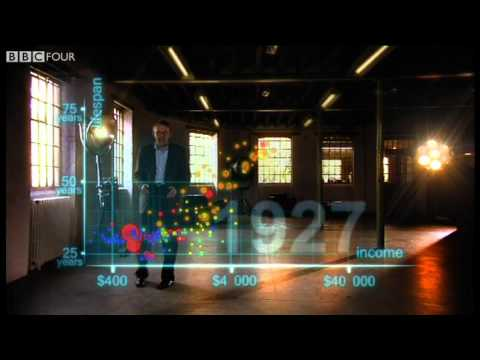

In [1]:
# Gapminder: Short and Sweet Version
from IPython.display import YouTubeVideo
YouTubeVideo("jbkSRLYSojo", width=400)

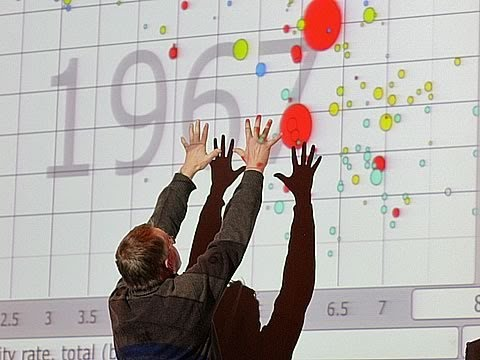

In [2]:
# Gapminder: Longer Version
YouTubeVideo("hVimVzgtD6w", width=400)

## Progress Indicators

Progress and improvement (and relative lack thereof) in the world can be tracked in a number of ways.  The STA130 course project will be based on considering the following data sources; although, students are certainly welcome to identify and consider additional data sources as they wish.

* Statistical tables from [UNICEF's 2023 State of the Worlds' Children report](https://data.unicef.org/resources/sowc-2023/)
* Indicators from [UNDP's Human Development Report](https://hdr.undp.org/data-center/documentation-and-downloads)
* [World Bank's World Development Indicators](https://datatopics.worldbank.org/world-development-indicators/the-world-by-income-and-region.html)
* [Fund for Peace's Fragile States Index](https://fragilestatesindex.org/excel/)

In [3]:
# Default Country Progress Indicator Data Sources for STA130 Course Project
sources = [{'name': 'unicef_sowc',
            'url': 'https://data.unicef.org/wp-content/uploads/2023/04/SOWC-2023-Statistical-tables-All-EN.xlsx'}, 
           {'name': 'undp_hdr',
            'url': 'https://hdr.undp.org/sites/default/files/2021-22_HDR/HDR21-22_Composite_indices_complete_time_series.csv'},
           {'name': 'worldbank_wbi',
            'url': 'https://datacatalogfiles.worldbank.org/ddh-published/0037712/DR0090755/CLASS.xlsx'},
           {'name': 'fundforpeace_fsi',
            'url': 'https://fragilestatesindex.org/wp-content/uploads/2023/06/FSI-2023-DOWNLOAD.xlsx'}]
# Code for fetching and combining these data not shown here.
# Some "noise" like various punctuation for missing values or footnotes
# have been removed but largely the same as upstream source values
import pandas as pd
df_indicators = pd.read_csv('country_indicators.csv')
df_indicators # 218 rows × 1332 columns
# At first, 1332 columns may seem like an awful lot of types of information; but, 
# humans easily read more than 1000 words (very quickly) when they're consuming information; so, 
# taking time to get a sense of the type of data that's available is reasonably achievable and doable

Unnamed: 0  sowc_demographics__population-thousands-2021_total  \
0             0                                         40099.4620    
1             1                                          2854.7100    
2             2                                         44177.9685    
3             3                                            79.0340    
4             4                                         34503.7735    
..          ...                                                ...    
213         213                                                NaN    
214         214                                                NaN    
215         215                                                NaN    
216         216                                                NaN    
217         217                                                NaN    

     sowc_demographics__population-thousands-2021_under-18  \
0                                           20297.8860       
1                                             574.3875       
2                                           15526.2050       
3                                              12.7765       
4                                           17832.9760       
..                                                 ...       
213                                                NaN       
214                                                NaN       
215                                                NaN       
216                                                NaN       
217                                                NaN       

     sowc_demographics__population-thousands-2021_under-5  \
0                                            6490.5540      
1                                             141.3930      
2                                            4870.8425      
3                                               2.5385      
4                                            5983.4065      
..                                                 ...      
213                                                NaN      
214                                                NaN      
215                                                NaN      
216                                                NaN      
217                                                NaN      

     sowc_demographics__annual-population-growth-rate_2000-2020  \
0                                             3.286824            
1                                             0.496681            
2                                             1.642661            
3                                             0.770116            
4                                             3.392806            
..                                                 ...            
213                                                NaN            
214                                                NaN            
215                                                NaN            
216                                                NaN            
217                                                NaN            

     sowc_demographics__annual-population-growth-rate_2020-2030-a  \
0                                             2.325169              
1                                             0.248324              
2                                             1.237367              
3                                             0.437249              
4                                             2.684447              
..                                                 ...              
213                                                NaN              
214                                                NaN              
215                                                NaN              
216                                                NaN              
217                                                NaN              

     sowc_demographics__annual-number-of

In [4]:
# columns are prefixed with sowc, hdr, fsi, wbi
# (and sowc has sub-prefixes for each sheet in the excel file)
printout_limit = 5
for pre in ['sowc', 'hdr', 'fsi', 'wbi']:
    display([c for c in df_indicators.columns.values if c.startswith(pre)][:printout_limit])

['sowc_demographics__population-thousands-2021_total',
 'sowc_demographics__population-thousands-2021_under-18',
 'sowc_demographics__population-thousands-2021_under-5',
 'sowc_demographics__annual-population-growth-rate_2000-2020',
 'sowc_demographics__annual-population-growth-rate_2020-2030-a']

['hdr_hdicode',
 'hdr_region',
 'hdr_hdi_rank_2021',
 'hdr_hdi_1990',
 'hdr_hdi_1991']

['fsi_year',
 'fsi_rank',
 'fsi_total',
 'fsi_s1:_demographic_pressures',
 'fsi_s2:_refugees_and_idps']

['wbi_income_group', 'wbi_lending_category', 'wbi_other_(emu_or_hipc)']

In [5]:
## [plotly maps](https://plotly.com/python/choropleth-maps/)
# https://plotly.com/python/#maps
import plotly.graph_objects as go
# feel free to visualize some of the other progress indicator variables as well!
progress_indicator = 'sowc_demographics__annual-population-growth-rate_2000-2020'
go.Figure(data = go.Choropleth(
          locations=df_indicators['iso3'], text=df_indicators['iso3'], z=df_indicators[progress_indicator], 
          colorscale = 'Greens', autocolorscale=False, reversescale=False, marker_line_color='darkgray',
          marker_line_width=0.5, colorbar_tickprefix='', colorbar_title="pop growth rate"))#progress_indicator))

## Project Motivation

Despite the generally improving conditions in the world over time, societal conflict still is a very real concern in many less fortunate parts of the world.  When societal conflict occurs, individual people first lose their homes and the places they belong, and then they lose access to the food and shelter necessary to their survival...

- **If we can predict when social conflict in a region will escalate we can be ready to provide food and shelter critical to survival, which can form the basis on which to rebuild a sense of "place" and "belonging" and help people reestablish their lives and find a way to get back "home".**

> Han's Rosling's videos showing how the world has progressed and improved are really great; but, let's not stop there.  Let's keep trying to help improve things so that the next person who makes a video like Han's Rosling's videos can have even more positive news to share with everyone. 

## Predicting Societal Conflict Escalation

By monitoring and using media and news reports and other data sources, we can construct models to predict the possibility of conflict escalation in unstable regions of the world. Evan Wheeler (UNICEF) along with his colleagues (e.g., in this [manusript](https://github.com/pointOfive/STA130_F23/tree/main/Project/manuscript.pdf) and associated [slides](https://github.com/pointOfive/STA130_F23/tree/main/Project/slides.pdf)) are doing just this, and have created three different prediction models to make a binary classification as to whether or not a conflict region will experience an escalation in the near future. The three predictive classification models are 

- a transformer based deep learning language model
- a small and shallow feed forward neural network
- and an (xgboost) gradient boosting machine learning model

and each model uses different subsets of the available data in slightly different ways to make their predictions. After fitting the three models using historical data, Evan and his colleagures made the predictions for a "test set" of the most recent next three months not used to fit the models. These are shown below. 

In [6]:
# contains boolean prediction, prediction probability, and 
# true values for each of the 3 models (transformer, xgboost, ffnn)
# on a held-out test set covering a 3 month period.
df_preds = pd.read_csv('test_predictions.csv')
df_preds
# NOTE: there are currently some disagreements on the true values as different model dataset calculated
# the response variable slightly differently than the other two; but, this can be revised and corrected

yearmonth fips  y_pred_transformer  y_pred_proba_transformer  \
0       202211   FJ               False                  0.183897   
1       202212   FJ               False                  0.267831   
2       202211   TZ               False                  0.482585   
3       202212   TZ               False                  0.187792   
4       202301   TZ                True                  0.539319   
..         ...  ...                 ...                       ...   
359     202211   MJ               False                  0.182196   
360     202212   MJ               False                  0.203236   
361     202211   TD                True                  0.527107   
362     202212   TD                True                  0.555677   
363     202301   TD                True                  0.565700   

     y_true_transformer  y_pred_xgboost  y_pred_proba_xgboost  y_true_xgboost  \
0                 False           False              0.066500           False   
1                 False           False              0.099643           False   
2                 False            True              0.704086            True   
3                 False            True              0.638444            True   
4                  True            True              0.608380           False   
..                  ...             ...                   ...             ...   
359               False           False              0.079453           False   
360               False           False              0.060189           False   
361               False            True              0.697625            True   
362               False            True              0.729246           False   
363                True            True              0.591722           False   

     y_pred_ffnn  y_pred_proba_ffnn  y_true_ffnn iso3  
0          False           0.409958        False  FJI  
1          False           0.406696        False  FJI  
2           True           0.545236        False  TZA  
3           True           0.534560        False  TZA  
4           True           0.538583         True  TZA  
..           ...                ...          ...  ...  
359        False           0.291874        False  MNE  
360        False           0.300321        False  MNE  
361        False           0.335496        False  TTO  
362        False           0.324000        False  TTO  
363        False           0.332455         True  TTO  

[364 rows x 12 columns]

In [7]:
fig = []
for model,colors in zip(['y_pred_proba_transformer', 'y_pred_proba_ffnn', 'y_pred_proba_xgboost'],
                        ['Reds', 'Blues', 'Greens']):
    fig += [go.Figure(data = go.Choropleth(
               locations=df_preds['iso3'], text=df_preds['iso3'], z=df_preds[model], 
               colorscale = colors, autocolorscale=False, reversescale=False, marker_line_color='darkgray',
               marker_line_width=0.5, colorbar_tickprefix='', colorbar_title=model))]
fig[0].show()
fig[1].show()
fig[2].show()

## Classification Thresholding 

> The material in this section is "advanced" in the sense that we won't formally cover the concepts here until later in the semester; so, it's fine if you don't consider things here too closely and carefully the first time around (and instead plan to return to it to understand it more fully and clearly later).  However, a general casual comfort with the ideas here will likely make everything feel more comfortable and sensible as you being your initial interactions and analyses with this course project data. 


The actual escalation (`True`) or lack thereof (`False`) of conflict in different countries (given in the ISO-3 [format](https://en.wikipedia.org/wiki/ISO_3166-1_alpha-3) in the `iso3` column) are reported in the `y_true_` columns of the data frame, while the binary classification predictions (`True` means escalation was predicted; whereas, `False` means no escalation was predicted) from the three models are given in the `y_pred_` columns. Also of interest are the probabilities associated with the binary classification prediction which are given in the `y_pred_proba_` columns.  

- The probabilities can initially be understood as the "chance of escalation of a conflict"; howevever, for that to be a good interpretation the would actually need to be so-called "calibrated" probabilities; and, it's not always the case that the probabilities associated with a prediction model are truly "calibrated"; so, it's perhaps more correct to think about these more as a prediction models "scale-free relative belief" that a conflict will escalate in a given location. 


- The probabilities are nonetheless potentially very useful because they can allow us to use different binary classification prediction **thresholds** to produce different binary classification predictions (of conflict escalation) which could then be used to priortize between **sensitivity** (correctly predicting escalation when it will happen) and **specificity** (correctly predicting no escalation when there won't be any) of the classification predictions, or other classification performance metrics that we might consider.  This is demonstrated briefly below; and, generally, additional exploration into the performance of different **thresholding** levels for the different models could potentially be an important consideration for subsequent analyses.  
  > In binary classification prediction, one of the predictions is often called a "postive" and the other is called a "negative". It's natural here, then, to consider a (`True`) prediction of escalation to be a "positive" and a (`False`) prediction of no escalation to be a "negative".  Using this language, we then have  
  >
  > - True Positive (TP): a country that experiences escalation was indeed predicted to do so
  > - False Negative (FN): a country that experiences escalation was (wrongly) not predicted to do so  
  > - True Negative (TN): a country that experiences no escalation was not predicted to do so
  > - False Postive (FP): a country that experiences not escalation was (wronly) predicted to do so    
  >
  > which in turn defines the above mentioned metrics    
  >
  > - **Sensitivity**: #TP/(#TP+#FN)
  > - **Specificity**: #TN/(#TN+#FP)  

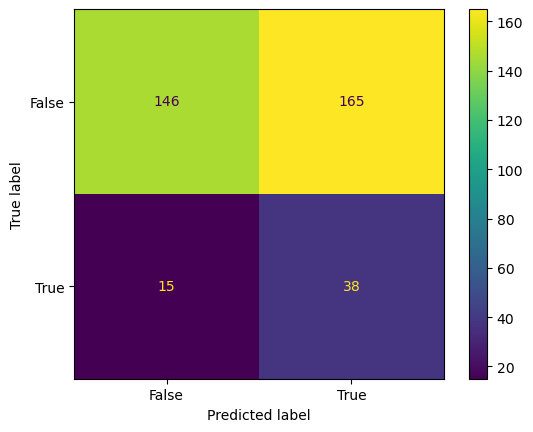

In [8]:
from sklearn.metrics import ConfusionMatrixDisplay
# `y_pred_` columns are by default based on `y_pred_proba_* > 0.5` of their corresponding probability columns
#_ = ConfusionMatrixDisplay.from_predictions(df_preds.y_true_transformer, df_preds.y_pred_transformer)
#_ = ConfusionMatrixDisplay.from_predictions(df_preds.y_true_ffnn, df_preds.y_pred_ffnn)
_ = ConfusionMatrixDisplay.from_predictions(df_preds.y_true_xgboost, df_preds.y_pred_xgboost)
# sensitivity 38/(38+15)
# specificity 146/(146+165)

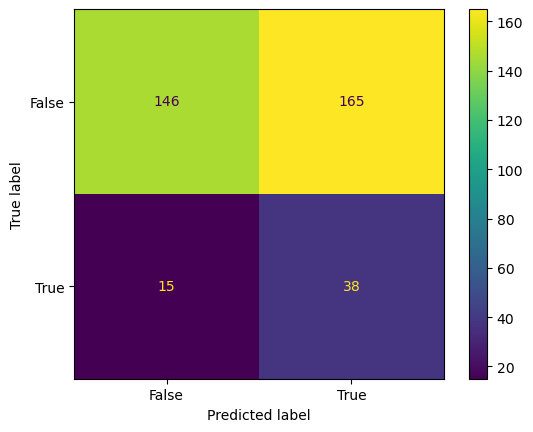

In [9]:
threshold = 0.5 # matches the confusion matrix above exactly so confirms that the default threshold is 0.5 
#_ = ConfusionMatrixDisplay.from_predictions(df_preds.y_true_transformer, 
#                                            df_preds.y_pred_proba_transformer>threshold)
#_ = ConfusionMatrixDisplay.from_predictions(df_preds.y_true_ffnn, 
#                                            df_preds.y_pred_proba_ffnn>threshold)
_ = ConfusionMatrixDisplay.from_predictions(df_preds.y_true_xgboost, 
                                            df_preds.y_pred_proba_xgboost>threshold)
# sensitivity 38/(38+15)
# specificity 146/(146+165)

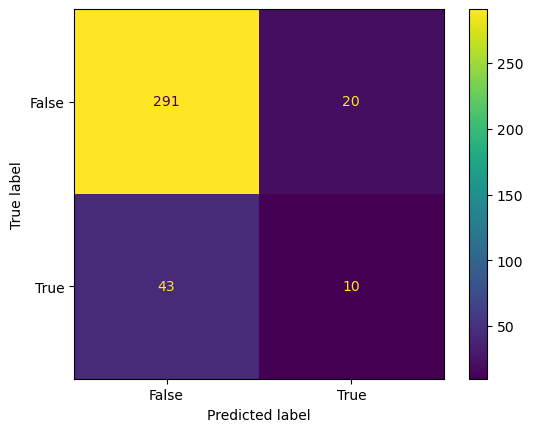

In [10]:
# so we can change the threshold to another value to 
threshold = 0.75 # fewer positive class predictions... increases specificity (at the cost of sensitivity)
#_ = ConfusionMatrixDisplay.from_predictions(df_preds.y_true_transformer, 
#                                            df_preds.y_pred_proba_transformer>threshold)
#_ = ConfusionMatrixDisplay.from_predictions(df_preds.y_true_ffnn, 
#                                            df_preds.y_pred_proba_ffnn>threshold)
_ = ConfusionMatrixDisplay.from_predictions(df_preds.y_true_xgboost, 
                                            df_preds.y_pred_proba_xgboost>threshold)
# sensitivity 10/(38+15) # denomenator is same as (43+10)
# specificity 291/(146+165) # denomenator is same as (291+20)

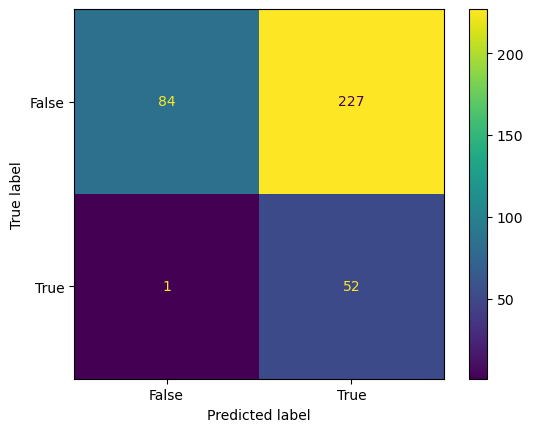

In [11]:
threshold = 0.25 # more positive class predictions... increases sensitivity (at the cost of sensitivity)
#_ = ConfusionMatrixDisplay.from_predictions(df_preds.y_true_transformer, 
#                                            df_preds.y_pred_proba_transformer>threshold)
#_ = ConfusionMatrixDisplay.from_predictions(df_preds.y_true_ffnn, 
#                                            df_preds.y_pred_proba_ffnn>threshold)
_ = ConfusionMatrixDisplay.from_predictions(df_preds.y_true_xgboost, 
                                            df_preds.y_pred_proba_xgboost>threshold)
# sensitivity 52/(38+15) # denomenator is same as (43+10) and (52+1)
# specificity 84/(146+165) # denomenator is same as (291+20) and (84+227)

### Imbalanced Classes

As can be seen in the **confusion matrices** above, there's less actual conflict escalation than non-escalation (which is of course generally a good thing). 

- The baseline rate of actual true conflict escalation doesn't change; and, this is of course reflected in how the denomenators for sensitivity $52/(38+15)=(43+10)=(52+1)$ and specificity $(146+165)=(291+20)=(84+227)$ are always the same and won't change despite using different thresholds to induce more or less positve class predictions. 

The **imbalanced class** situation in our context means that there's naturally a "bias" towards predicting that conflict situations won't escalate (since more conflict situations do not escalate); and, this "bias" can deeply influence how the models make their predictions. 

- Given that the classes are imbalanced in our context (with about 18% of all country-months in the training set actually experiencing conflict escalation), the creation process for each model was actually based on advanced "oversampling" and "regularization" techniques designed to help the models avoid always predicting the negative class. This is especially important since from the perspective of UNICEF, false negatives are worse than false positives.

While we do not have control over how the models were initially created to deal with the presnse of **class imbalance** in our context, we can still nonetheless adjust the **thresholding** levels defining the final binary classification predictions which allows us to exert some control on the overall relative amount of positve and negative class predictions that are finally made by the different models; and, this is our primary tool to address the **class imbalance** "bias" present in our data and influence the various performance metrics such as **sensitivity** and **specificity** that are affected by this "bias". 

## Model Performance

The **confusion matrices** above allow us to consider **sensitivity** and **specificity** (potentially with respect to different classification **thresholds**) [and related [performance metrics](https://en.wikipedia.org/wiki/Sensitivity_and_specificity#Confusion_matrix), such as ROC curves, AUC scores, F1 scores, etc.]; however, a couple of other possible alternative ways in which model performance could be examined are the following:

- as a **regression prediction problem** "predicting" the prediction "error" $y_i-\hat y_i = \overset{\text{Actual Conflict}}{\underset{\text{$1$ if so; $0$; otherwise}}{[1/0]_{[\text{Escalation?}]}}} - \underset{\text{Model Prediction}}{\Pr(\text{escalation?})}$


- as a **(multiclass) classification prediction problem** "predicting" classification "correctness" performance into the following categories: 

    - "correctly predicted escalation"; "correctly predicted no escalation"; "wrongly predicted escalation"; or, "wrongly predicted no escalation"
    
    - or, as one of the these specific categories versus "the rest"
    
    - or, even simply aggregated as "correct" versus "incorrect"
    
> Multilabel classification is just the natural extention of binary classification where more than two classes are possible.  Most of what is done in binary classification just naturally generalizes to multilabel classification; so, there's not really a major transition represented in the extension of binary classification multilabel classification. It's nothing to get too concerned or have any hesitance about.


In [12]:
# Example Regression Outcome ([probability prediction "error"] to be predicted)

# using transformer for this example demonstration, as opposed to
# df_preds.y_true_ffnn and df_preds.y_pred_proba_ffnn
# df_preds.y_true_xgboost and df_preds.y_pred_proba_xgboost

# quick and dirty scalars to represent prediction 'wrongness'
# (subtract model's prediction probability from boolean true value)
df_preds['transformer_probability_prediction_error'] = df_preds['y_true_transformer'].astype(float) - df_preds['y_pred_proba_transformer']
df_preds[['y_true_transformer','y_pred_proba_transformer','transformer_probability_prediction_error']]

y_true_transformer  y_pred_proba_transformer  \
0                 False                  0.183897   
1                 False                  0.267831   
2                 False                  0.482585   
3                 False                  0.187792   
4                  True                  0.539319   
..                  ...                       ...   
359               False                  0.182196   
360               False                  0.203236   
361               False                  0.527107   
362               False                  0.555677   
363                True                  0.565700   

     transformer_probability_prediction_error  
0                                   -0.183897  
1                                   -0.267831  
2                                   -0.482585  
3                                   -0.187792  
4                                    0.460681  
..                                        ...  
359                                 -0.182196  
360                                 -0.203236  
361                                 -0.527107  
362                                 -0.555677  
363                                  0.434300  

[364 rows x 3 columns]

In [13]:
# Example Classification Outcome ([classification prediction "correctness"] to be predicted)

threshold = 0.5 # using default classification threshold

# using transformer for this example demonstration, as opposed to
# df_preds.y_true_ffnn and df_preds.y_pred_proba_ffnn>threshold
# df_preds.y_true_xgboost and df_preds.y_pred_proba_xgboost>threshold
df_preds['transformer_classifcation_performance_outcome'] = None

tmp = df_preds['transformer_classifcation_performance_outcome'].copy()
TP_pos_pred_correct = df_preds.y_true_transformer & (df_preds.y_pred_proba_transformer>threshold)
tmp[TP_pos_pred_correct] = "correctly predicted escalation"
TN_neg_pred_correct = (~df_preds.y_true_transformer) & (df_preds.y_pred_proba_transformer<=threshold)
tmp[TN_neg_pred_correct] = "correctly predicted no escalation"
FP_pos_pred_wrong = (~df_preds.y_true_transformer) & (df_preds.y_pred_proba_transformer>threshold)
tmp[FP_pos_pred_wrong] = "wrongly predicted escalation"
FN_neg_pred_wrong = df_preds.y_true_transformer & (df_preds.y_pred_proba_transformer<=threshold)
tmp[FN_neg_pred_wrong] = "wrongly predicted no escalation"

df_preds['transformer_classifcation_performance_outcome'] = tmp
df_preds[['y_true_transformer','y_pred_transformer','transformer_classifcation_performance_outcome']][30:50]

y_true_transformer  y_pred_transformer  \
30                True                True   
31               False                True   
32               False                True   
33               False                True   
34               False               False   
35               False                True   
36               False               False   
37               False               False   
38               False                True   
39               False                True   
40               False                True   
41               False                True   
42               False                True   
43               False               False   
44               False               False   
45               False               False   
46               False               False   
47                True               False   
48               False               False   
49               False               False   

   transformer_classifcation_performance_outcome  
30                correctly predicted escalation  
31                  wrongly predicted escalation  
32                  wrongly predicted escalation  
33                  wrongly predicted escalation  
34             correctly predicted no escalation  
35                  wrongly predicted escalation  
36             correctly predicted no escalation  
37             correctly predicted no escalation  
38                  wrongly predicted escalation  
39                  wrongly predicted escalation  
40                  wrongly predicted escalation  
41                  wrongly predicted escalation  
42                  wrongly predicted escalation  
43             correctly predicted no escalation  
44             correctly predicted no escalation  
45             correctly predicted no escalation  
46             correctly predicted no escalation  
47               wrongly predicted no escalation  
48             correctly predicted no escalation  
49             correctly predicted no escalation

# October 27th Tutorial Assignment

### Practice for the *confidence interval* and *hypothesis testing* topics on the Midterm Examination...

- Work in your course project team groups (which should be finalized at the beginning of the Oct 27 tutorial).
- Include your name and your teammates name on a freshly created `.ipynb` file you individually submit showing your work for this assignment.
    - *Do not do your work in this notebook and then submit this notebook:<br>Create a new `.ipynb` notebook that includes what you need to show your work, and show your work in that file.*
- Submit your own work **on Quercus** by 9 AM ET Oct 30th.
    - *Your work does not necessarily need to be the same as the other members of your group; but, clearly indicate wheather the work is your own or adopted as joint work of the group.*
- **Your mark for the Tutorial Assignment will be based on completing the items below and the clarity and understandability of your work.**
    - ***TAs will generally grade group submissions as a whole, but may review individual submissions to comment on analyses if appropriate.***
    - ***There are about 10 items requested for submission below, and your mark will be a rough evalution of the proportion of these that are well-completed.***

## The following simulation code templates should be helpful...

In [14]:
import numpy as np

# arbitrary simulation parameters
n,R = 5,100

# a first sample
sample_1 = np.arange(n)

# bootstrapping a single sample
for rep in range(R):
    bootstrap_sample = np.random.choice(sample_1, size=n)

# coin flipping under a specified null hypothesis
for rep in range(R):
    binary_sample = np.random.choice([0,1], p=[0.5,0.5], size=n)

# a second sample
sample_2 = np.arange(n,2*n)

# bootstrapping two samples separately
for rep in range(R):
    bootstrap_sample_1 = np.random.choice(sample_1, size=n)
    bootstrap_sample_2 = np.random.choice(sample_2, size=n)
    
# permutation/shuffling of "treatment/group" labels
# corresponds to a null hypothesis that the "treatment/group" labels don't matter
labels = np.array(["sample_1"]*n + ["sample_2"]*n)
all_samples = np.concatenate([sample_1, sample_2], axis=0)
for rep in range(R):
    # `replace=False` is very important
    shuffled_samples = np.random.choice(all_samples, size=n*2, replace=False)
    # keeping the same original sample sizes is very important
    shuffled_sample_1 = shuffled_samples[labels=="sample_1"]#[:n]
    shuffled_sample_2 = shuffled_samples[labels=="sample_2"]#[n:]

# "paired" samples analysis
sample_difference = sample_1 - sample_2

# bootstrapping a "paired" sample
for rep in range(R):
    bootstrap_sample = np.random.choice(sample_difference, size=n)

# null hypothesis of "order doesn't matter" for a "paired" sample
for rep in range(R):
    order_of_subtraction = np.random.choice([1,-1], p=[0.5,0.5], size=n)
    sample_difference_random_order = sample_difference*order_of_subtraction

## Model Performance Differentiation  

Having three different models (`xgboost`, `ffnn`, and `transformer`) could be useful if the different models work better for different parts of the world.  Indeed, judging from the map visualizations above, the different models do indeed appear to be making different predictions in different parts of the world. 

> In order for an organization like UNICEF to make informed decisions based on model predictions, they need to better understand the strengths and weaknesses of their models. For example, does one model perform better in specific regions or geographies compared to the others? Is one more accurate making predictions for richer countries and another more accurate for poorer countries? 
>
> > The "Progress Indicators" data is joined with the "Models Predictions" data for the three models below. Using "all the data" means examining all the predictions made for the model(s) under consideration; whereas, "using a data subset" means restricting the rows of the data on the basis of one (or more) of the columns from the "Progress Indicators" data so as to only consider the predictions made for the model(s) under consideration within a given subset of (the rows of) the data.
>
> Potentially relevant subsets of data that might be of interest could be created on the basis of Human Development Index categories, Fragile States Index categories, World Bank economy categories, etc.; or, perhaps by alternatively restricting the data to countries with specific continuous variable values that fall within specified thresholds or limits. 


Consider the following characterization of different confidence interval and hypothesis test analyses that might be considered with respect to the **regression** and **classification** model performance "error" and "correctness" outcomes introduced above.

- Model performance estimation and/or hypothesis testing on a chosen set of data
- Comparison of the performance of a chosen model across different subsets of data
- Comparison of differential performance between two models on a chosen set of data


| | | Regression | Classification | 
|-|-|-|-|
| Model Performance Estimation | Specific Data (Sub?)Set | Average (or median, etc.) error rates | Proportion of prediction outcomes | 
| Internal Performance Changes | Across Different Data Subsets | Changes in average (or median, etc.) error rates | Changes in proportion of prediction outcomes | 
| Different Model Comparisons | Specific Data (Sub?)Set | Difference in average (or median, etc.) error rates | Difference in proportion of prediction outcomes | 




In [15]:
# Both datasets have iso3 columns, so we can merge into single dataframe
df = df_preds.merge(df_indicators, left_on='iso3', right_on='iso3', how='inner')
df
# You may need to (and should) be careful about missing `NaN` data...

yearmonth fips  y_pred_transformer  y_pred_proba_transformer  \
0       202211   FJ               False                  0.183897   
1       202212   FJ               False                  0.267831   
2       202211   TZ               False                  0.482585   
3       202212   TZ               False                  0.187792   
4       202301   TZ                True                  0.539319   
..         ...  ...                 ...                       ...   
359     202211   MJ               False                  0.182196   
360     202212   MJ               False                  0.203236   
361     202211   TD                True                  0.527107   
362     202212   TD                True                  0.555677   
363     202301   TD                True                  0.565700   

     y_true_transformer  y_pred_xgboost  y_pred_proba_xgboost  y_true_xgboost  \
0                 False           False              0.066500           False   
1                 False           False              0.099643           False   
2                 False            True              0.704086            True   
3                 False            True              0.638444            True   
4                  True            True              0.608380           False   
..                  ...             ...                   ...             ...   
359               False           False              0.079453           False   
360               False           False              0.060189           False   
361               False            True              0.697625            True   
362               False            True              0.729246           False   
363                True            True              0.591722           False   

     y_pred_ffnn  y_pred_proba_ffnn  ...  \
0          False           0.409958  ...   
1          False           0.406696  ...   
2           True           0.545236  ...   
3           True           0.534560  ...   
4           True           0.538583  ...   
..           ...                ...  ...   
359        False           0.291874  ...   
360        False           0.300321  ...   
361        False           0.335496  ...   
362        False           0.324000  ...   
363        False           0.332455  ...   

     fsi_e3:_human_flight_and_brain_drain fsi_e2:_economic_inequality  \
0                                     7.6                         5.0   
1                                     7.6                         5.0   
2                                     6.4                         7.3   
3                                     6.4                         7.3   
4                                     6.4                         7.3   
..                                    ...                         ...   
359                                   5.4                         2.4   
360                                   5.4                         2.4   
361                                   6.8                         4.7   
362                                   6.8                         4.7   
363                                   6.8                         4.7   

     fsi_e1:_economy fsi_p1:_state_legitimacy  fsi_p2:_public_services  \
0                7.5                      6.1                      4.2   
1                7.5                      6.1                      4.2   
2                6.2                      6.9                      8.4   
3                6.2                      6.9                      8.4   
4                6.2                      6.9                      8.4   
..               ...                      ...                      ...   
359              5.8                      3.9                      3.8   
360              5.8                      3.9                      3.8   
361              3.9                      3.5                      4.3   
362              3.9                      3.5            

> The analyses you're asked to do below will give you practice creating different subsets of data, and reviewing the types of confidence interval and hypothesis testing analyses we've considered in the course so far. The subsequent section on *"Paired" Data* below will introduce yet another extension of these analyses, which, in the end will behave like a combination of the one- and two-sample analyses you're already familiar with.  Being able to generalize what you know to execute the new kinds of analyses is a very good practice for the way the exams in this class are written; namely, the exams attempt to test your strength, comfort, and familiarity with the topics of the course by being able to apply and use them in new contexts and situations. 

### "Unpaired" Data    

- Make sure the sequence of analyses that you perform are clear and understandable. E.g., what model(s) data are used, and for what data subset(s)?
    - **Your mark for the Tutorial Assignment will be based on completing the items below and the clarity and understandability of your work.**
    
    
- Create the **regression** "error" outcomes for the `xgboost` and `ffnn` models analagously to the `transformer` model produced above.
- Create a bootsrap confidence interval for the "average error" for the prediction errors for all the data for one of these models.
- Create the **classification** "correctness" outcomes for the `xgboost` and `ffnn` models analagously to the `transformer` model produced above.
- Perform a hypothesis test of the model performance for the "proportion" of a specific "correctness category" for the classification predictions made for all the data by one of these models.
    - When performing a hypothesis test you'll need to determine and specify the null hypothesis under consideration; obtain a p-value (either through simulation, or `scipy.stats.binom` or `scipy.stats.ttest_1samp`); and, finally, provide a statement of the degree of evidence against the null hypothesis (https://www.jcpcarchives.org/userfiles/values-of-p-Inference.jpg).
- Consider the "Progress Indicators" data and use "boolean selection" with one (or more) of the columns to restrict the data to a subset (of rows) of data and carry out the same analysis above as above but instead only using this specified subset of data.
    - *Potentially relevant subsets of data that might be of interest could be created on the basis of Human Development Index categories, Fragile States Index categories, World Bank economy categories, etc.; or, perhaps by alternatively restricting the data to countries with specific continuous variable values that fall within specified thresholds or limits.* 
- Create a two-sample bootstrap confidence interval and perform a hypothesis test comparing the performance of a single model for the data subset created above versus the remaining data not included in that data subset.
    - A two-sample bootstrap confidence interval is created by repeatedly bootrapping each of the two data subsets individually
    - A hypothesis test for two ("unpaired") samples can be carried out on the basis of permutating/shuffling group membership (while ensuring that the original subset sample sizes remain unchanged) to create a sampling distribution under a null hypothesis assumption of "no difference between groups", or based on `scipy.stats.median_test` which assumes the *medians* of the two groups are identical (or the more powerful `scipy.stats.mannwhitneyu` which again assumes "no difference between groups"), or `scipy.stats.ttest_ind` which assumes the *means* of the two groups are identical (and that the samples come from normally distributed populations).

### "Paired" Data

The analyses above considered one- and two-sample subsets of data, with samples defined on the basis of specific subsets of data; however, this data utilized above is considered "unpaired" since a given observed outcome is not considered "twice" in a "repeated" or "paired" sort of way with respect to some slightly different conditions. This is no longer the case if we instead compare the result of predictions from two different models on some (sub)set of data; since, because the predictions from two different models are made for the same country, these predictions will be natually "paired" together.  

It turns out that "paired" data is naturally more powerful than "unpaired" data because it allows us to examine the comparision on the basis of the behavior individual pairs of data, as opposed to a relative comparison between one whole sample versus another whole sample.  To perform a "paired" analysis, each individual "pair" of data is turned into a single numeric value of the difference (calculated in the same consistent manner across all sets of pairs) between the values of the pair. So for two samples $x$ and $y$ where $x_i$ is "paired" with $y_i$, the "paired" analysis simply becomes a one-sample anslysis on the basis of $z_i=x_i-y_i$ with a natural null hypothesis assumption that there is no difference on average between the two values comprising the pairs.

> Note that paring two samples requires more than just having the same sample size: the pairing must reflect an actual naturally meaningful pair construction justification.


- Create a bootstrap confidence interval and a hypothesis test comparing the performance of two the models across all the data on the basis of a "paired" sample analysis (by transforming the paired sample into a single $z_i=x_i-y_i$ difference sample).
    - A bootstrap confidence interval is created by bootrapping from the sample of "paired differences"; whereas, the sampling distribution of the null hypothesis can be constructed using a permutation/shuffling approach which randomly reassigns the sample membership within each of the paired samples. Functions performing theoretical nonparametric and parametric "paired" sample analyses are `scipy.stats.wilcoxon` and `scipy.stats.ttest_rel`, where the null hypothesis of the latter assumes "no difference on average" between the pairs (and that the samples come from normally distributed populations). while the null hypothesis of the former assumes the slightly different "no tendency for one of the samples in the pair to be larger than the other".
- Repeat the above analysis for different model pairs on some different subsets of data.


- Make sure the sequence of analyses that you perform are clear and understandable. E.g., what model(s) data are used, and for what data subset(s)?
    - **Your mark for the Tutorial Assignment will be based on completing the items below and the clarity and understandability of your work.**

# November 3rd Tutorial Activity [Doubles as a Project Assignment]


#### You may want to complete this before reading week; although, it's due upon your return from reading week; but, regardless, this material is meant to introduce you to the topics of the second half of the semester (and what you'll generally be trying to do in the course project).

- Work with your course project team to create and submit a `.pptx` or some other viewable presentation slides file based on a "Slideshow" `.ipynb`.
    - Create your slide as a `.ipynb` "Slideshow"; but, then screenshot the slides as images and make a (`.pptx`?) slide deck out of those images.
    - This is a "strange" and "hacky" way to do this; but, unfortunately, creating `.pdf` slides directly from  `.ipynb` "Slideshows" which maintains the formatting you've created in your `.ipynb` "Slideshow" requires some advanced command line operations that we will not attempt in STA130.
- Submit your `.pptx` or some other viewable presentation slides and `.ipynb` "Slideshow" files **on Quercus** by 9 AM ET Nov 13th.

- Evaluation of this Tutorial Activity will be, according to the rubric below, based on your team's submitted presentation slides demonstrating your exploration and potential identification of *predictors (covariates/features)* from the "Progress Indicators" data (which partition the data into different country subsets) that seem to be "predictive" of performance differences between the `transformer`, `ffnn`, and `xgboost` models.

|Rubric|Points|
|-|-|
| Submitted (`pptx.`?) presentation slides provide a nice "print out" of the created "Slideshow" `.ipynb` formatting  | 20% | 
| `MarkDown` header, bullet point, numeric outline, comment block, text format, figure, and table elements are utilized | 10% | 
| Includes Confidence Interval and Hypothesis testing analysis code and results from the Oct 27 Tutorial Assignment  | 20% | 
| Includes geographic visualizations of data and model performance "**metrics**" (other than "error" and "correctness") | 20% | 
| Explores and characterizes "Progress Indicators" data based country partitions "predictive" of model performance | 20% | 
| Explores, analyzes, and visualizes how **classification thresholding** can drive model **confusion matrix** performance | 10% | 


## Model Performance Metrics Differentiation

> For the STA130 course project your group will use **regression** and **classification** analyses to identify *predictors (covariates/features)* from the "Progress Indicators" data that are "predictive" of the respective **regression** and **classification** "error" and "correctness" performance *outcomes* introduced above; but, for now, we just want to begin by exploring the "Progress Indicators" data to identify some of the pieces of information available there that might eventually be useful for the task of predicting differential model performance. Two initial ideas of how we can begin this exploratory analysis are as follows.
> - Use Confidence Intervals and Hypothesis testing to compare model prediction "error" and "correctness" performance *outcomes* between different models on different subsets of country groups (as was done at the end of the October 27th Tutorial Assignment).
> - Informally examine and explore how overall model performance **metrics** -- evaluations of model performance, such **accuracy**, **sensitivity**, and **specificity**, etc., aggregated over different data subsets (as opposed to formal analyses comparing "paired" samples of individual country-level prediction "error" and "correctness" *outcomes*) -- differentially vary for different models across different subsets of country groups. 

The three (`transformer`, `ffnn`, and `xgboost`) prediction models available to UNICEF perform similarly according to some **metrics** like AUC (area under the [ROC] curve) and F1; however, each model has differing strengths and weaknesses according to alternative **metrics** like **accuracy**, **sensitivity**, and **specificity**, etc., especially depending upon the **threshold** used to determine their binary classification predictions. 

- **As demonstrated in the code below** different performance **metrics** calculated within different subsets of countries (e.g., based on Human Development Index categories, Fragile States Index categories, World Bank economy categories, etc.) can be examined in an exploratory manner by recomputing the **metrics** within different country subsets and then visually comparing them (on a map). 

> If UNICEF wants to incorporate conflict predictions into planning, they may be able to make more informed decisions when these model predictions don’t agree for a given country if they have a better understanding of each model's performance behaviors and biases. 
>
> Presumably, country-level indicators (given in the "Progress Indicators" data) exist because they are useful in characterizing substantive differences across the ~200 countries on Earth; and, the features derived from news article texts about countries used by the three (`transformer`, `ffnn`, and `xgboost`) models to make their predictions probably reflect some of these substantive differences. Given that the different models have different architectures and powers (e.g., `ffnn` is a shallow network with 32 neurons), we might hypothesize that these models could have learned different things about the countries from the news article inputs; and, that similar differences may be represented in country-level indicators (in the "Progress Indicators" data). 
>
> So, it may be possible to characterize the three model's performance behaviors and biases on the basis of the country-level indicators (in the "Progress Indicators" data), and this is what we'd like to do: we'd like to understand which subsets of countries each of the models seems to perform well on (or poorly on), and characterizing this might help us decide which of the models to prefer when they disagree on their predictions on the basis of the kind of country they're making their predictions on. 


Ideally, an analysis of the three models could provide evidence for claims like "model A has higher accuracy than B or C for stable, industrialized countries; while, model B has higher accuracy than A or C for non-anglophone countries with high maternal mortality."  There are thus two aspects under consideration in this Tutorial Activity which should be explored and presented in your tutorial activity submission.
- What partitioning of countries seems to identify and exhibit differential model performance?
- What kinds of differential performance in the three models can be characterized and shown?


In [16]:
from sklearn import metrics
import seaborn as sns

column_defining_groups = 'hdr_hdicode'
# lets group countries by Human Development index category.
# could also group by continent, language, bins of under-5 mortality, etc.... any grouping you use or define
chosen_metric = 'accuracy_score'
# sklearn.metrics has many metrics appropriate for binary classification tasks.
# nice explanations here: https://neptune.ai/blog/evaluation-metrics-binary-classification
# could also chosose, e.g., 'recall_score' (which is sensitivity; but, 'recall_score' 
# will alternatively be specificity if `pos_label=False` is added as noted below), 
# 'auc' (threshold doesn't matter), 'f1_score', 'cohen_kappa_score', etc.
metric_function = getattr(metrics, chosen_metric)

chosen_metric_for_chosen_groups = list()
chosen_metric_back_into_original_data = {'ffnn': pd.Series(index=df.index, dtype=np.float64), 
                                         'xgboost': pd.Series(index=df.index, dtype=np.float64), 
                                         'transformer': pd.Series(index=df.index, dtype=np.float64)}
    
for g, rows in df.groupby(column_defining_groups):
    for model in ['ffnn', 'xgboost', 'transformer']:        
        chosen_metric_value = metric_function(rows[f"y_true_{model}"], rows[f"y_pred_{model}"])
        # Use the commented version below when using 'recall_score' to make it "specificity" 
        # rather than sensitivity which is what 'recall_score' gives if `pos_label=False` isn't used
        #chosen_metric_value = metric_function(rows[f"y_true_{model}"], 
        #                                      rows[f"y_pred_{model}"], pos_label=False) # specificity 
        
        chosen_metric_back_into_original_data[model][rows.index] = chosen_metric_value
        chosen_metric_for_chosen_groups.append((model, g, chosen_metric_value))

cm_bigger_better = sns.light_palette("green", as_cmap=True)
# https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html#Styler-Object-and-Customising-the-Display
styler = ( pd.DataFrame(chosen_metric_for_chosen_groups, 
                        columns=('model', column_defining_groups, chosen_metric))
            .sort_values(column_defining_groups).style
            .background_gradient(cmap=cm_bigger_better)
            .format(precision=3).hide(axis="index"))
styler

In [17]:
fig = []
for model,colors in zip(['ffnn', 'xgboost', 'transformer'],['Reds', 'Blues', 'Greens']):
    fig += [go.Figure(data = go.Choropleth(locations=df_preds['iso3'], text=df_preds['iso3'], 
                                           z=chosen_metric_back_into_original_data[model], 
               colorscale = colors, autocolorscale=False, reversescale=False, marker_line_color='darkgray',
               marker_line_width=0.5, colorbar_tickprefix='', colorbar_title=model+" "+chosen_metric))]
fig[0].show()
fig[1].show()
fig[2].show()

# STA130 Course Project Assignment

Based on everything presented in this notebook so far, it should be clear at a high level what **regression** and **classification** models do; namely, they predict values or classes of interest. However, how this is exactly done is not something that we'll cover in class until the end of the semester; so (until then), suffice it to say, **regression** and **classification** seek to use *predictors (covariates/features)* to predict *outcomes*, and identify specifically how they do so. 

Actually, creating a confidence interval or prforming hypothesis test to compare and analyze differences between two samples is a very simple version of what **regression** and **classification** models do. If an  average is estimated to differ between two populations, then different predictions are made for the two groups and the explanation for this is the difference(s) between the two sets of data defined by the groups themselves. This is very much like what **regression** and **classification** models do; except, **regression** and **classification** models can analyze (the impact of) multiple factors (*predictors, i.e., covariates/features*) on an outcome all simultaneously together at the same time at once; and, the factors that **regression** and **classification** models can consider are not just different groups, but also continuous numeric values that could help predict outcomes (like how height might be used to predict weight). 

> We previously introduced prediction "error" and "correctness" performance *outcomes* for **regression** and **classification**, respectively.  Notice however, that these *outcomes* are distinct from the original probability and classification predictions provided in the "Models Predictions" data.  Because of this, seeking to understand 
> - how "Progress Indicators" data *predictors (covariates/features)* predict prediction "error" and "correctness" performance *outcomes* 
>
> is different from seeking to understand how
> - how "Progress Indicators" data *predictors (covariates/features)* predict the original probability and classification predictions
>
> In the former analysis, we are trying to learn what predicts model performance; whereas, in the latter analysis we are trying to learn what determines the models predictions themselves. For the purposes of this project we **are not** interested in attempting the latter exercise of determining how the model predictions themselves are made; rather, **we are interested in the former exercise of predicting where different models perform best**. 

If we could learn which *predictors (covariates/features)* from the "Progress Indicators" data can predict **regression** prediction "error" and **classification** prediction "correctness" *outcomes*, and if these performance *outcomes* tend to differ for the different (`transformer`, `ffnn`, and `xgboost`) models in different contexts in different parts of the world, then these models could be used in a combined ("stacked") manner where different model predictions are used in different contexts and settings where they are the most accurate. We thus want to identify and be able to predict the models differential performance using the "Progress Indicators" data so that the different models can be differentially leveraged to produce more accurate predictions overall.

## Model Performance Differentiation Prediction 


> The previous project-related work that your group did explored differences in prediction "error" and "correctness" performance *outcomes* across different country subsets defined by the "Progress Indicators" data using Confidence Intervals and Hypothesis tests; then, you examined how overall aggregated model performance **metrics** varried across different country subsets (again defined by the "Progress Indicators" data).  These analyses should have given you a pretty good initial idea  of what pieces of the "Progress Indicators" data might be useful for predicting "error" and "correctness" performance *outcomes*. 

For your course project you will now use **regression** and **classification** to analyze how predictive "error" and "correctness" performance outcomes of the different models differentiate on the basis of the *predictors (covariates/features)* in the "Progress Indicators" data.  

- A reasonable approach to initially examine how ***regression*** prediction "error" differs between the models is to use all models predictions and statistically analyze the potential presense of interactions between the utilized *predictors (covariates/features)* in the "Progress Indicators" data and the indicators of which model is used to make the prediction.  

- A similar analysis can proceed for ***classification*** prediction "correctness" by fitting a **decision tree** to the prediction "correctness" outcomes for all models predictions, which, along with *predictors (covariates/features)* in the "Progress Indicators" data, also uses *an indicator of the model used to make the prediction*. Then, the distributions of (the probabilities of) "correctness" predictions made by the **decision tree** can be compared for the different countries for different specifications of *the indicator of the model used to make the prediction* is changed. 

When carrying out these analyses, it is very important to realize that you are model building and so considerations of training and testing data should be made to protect against accidental overfitting of the models in your analysis, which could lead to a lack of generalization an incorrectness of your findings. 

Nonetheless, with all these ideas in mind, can you determine the best combined use of the (`transformer`, `ffnn`, and `xgboost`) models? 

Your course project submission will be a slide deck presentation which identifies and demonstrates differences in model prediction performance; and, provides guidance and recommendation as to how these findings can be used to improve UNICEF responses; and, quantifies what performance improvements that might be expected based on your proposals. The course project slides submission will be evaluated based on the following rubric.

| | |
|-|-|
|20% | Effective use of visualizations to convey notable findings and conclusions from the data |
|    | 0% no interesting or helpful figures; 5% some interesting figures poorly formatted/labeled;<br>10% some interesting and helpful figures well formatted/labeled, but some bad figures as well;<br>15% good figures, but opportunities to use figures for clear communication were missed<br> |
|20% | Effective use of confidence intervals and/or hypothesis testing to guide and justify analysis |
|    | 0% neither used correctly; 5% one used correctly; 10% one used correctly in a mannner that<br>effectively developed and progressed the project progression; 15% both used correctly and<br>one of which was used to clearly effectively develope and progress the project progression |
|20% | Effective use of regression analysis and/or classification decision trees to draw conclusions from the data |
|    | 0% neither used correctly; 5% one used correctly; 10% one used correctly in a mannner that<br>effectively developed and progressed the project progression; 15% both used correctly and<br>one of which was used to clearly effectively develope and progress the project progression |
|20% | A compelling and well-organized presentation leading to your conclusions and recommendations, and a<br>clear presentation of the potential relative performance gains expected from proeject recommendation |
|    | 5% formatting and narrative aren't great; 10% it's pretty good; 15% it's compelling;<br>20% the project findings and conclusions dispell suspicion and are likely trustworthy |
|20% | Fair and reasonable critiques of potential issues in your analyses which might limit conclusion correctness |
|    | 0% does not address assumptions of statistical analysis or concerns regarding generalization; <br>5% some assumptions for some analyses; 10% most relevant assumptions for some analyses;<br>15% most relevant assumptions for most analyses; final 5% based on handing of train-testing |


You will additionally present your course project slides and your presentation. Your presentation will be evaluated based on the following rubric.

| | |
|-|-|
|20% | Effective use of `.ipynb` "slideshow" formatting to organize and present findings and analysis |
|    | 0% `.ipynb` "slideshow" formatting not used; 5% not used well; 10% sometimes used well;<br>15% `.ipynb` "slideshow" formatting used well and appropriately the majority of the time |
|20% | Effective use of graphical visualizations to convey notable findings and conclusions from the data |
|    | 0% no interesting or helpful figures; 5% some interesting figures poorly formatted/labeled;<br>10% some interesting and helpful figures well formatted/labeled, but some bad figures as well;<br>15% good figures, but opportunities to use figures for clear communication were missed<br> |
|20% | Quality of actual verbal presentation |
|    | 0% not good; 5% some group members pretty good; 10% most group members pretty good;<br>15% all group members pretty good; 20% an amazing presentation with clear conclusions |
|20% | A compelling and well-organized presentation leading to your conclusions and recommendations, and a<br>clear presentation of the potential relative performance gains expected from proeject recommendation |
|    | 5% organization and narrative aren't great; 10% it's pretty good; 15% it's compelling;<br>20% the project findings and conclusions dispell suspicion and are likely trustworthy |
|20% | Effective presentation of technical methodological analysis and findings and conclusions |
|    | 0% none presented well; 5% one presented well; 10% two presented well<br>15% three presented well; 20% all presented well |

In [131]:
# Here's an example of how I might proceed with this analysis...

df['error1'] = df.y_true_transformer-df.y_pred_proba_transformer
df['model1'] = df.fips*0+"transformer"
df['error2'] = df.y_true_ffnn-df.y_pred_proba_ffnn
df['model2'] = df.fips*0+"ffnn"
df['error3'] = df.y_true_xgboost-df.y_pred_proba_xgboost
df['model3'] = df.fips*0+"xgboost"
# Are SOWC indicators linearly related to the xgboost model's test set performance?
# pick some random sowc columns that don't have missing values.
np.random.seed(1)
exogs = df[[c for c in df.columns.values if c.startswith('sowc')]].dropna(axis='columns').sample(5, axis=1)
exogs = (exogs - exogs.mean())/exogs.std() # standardizing variables is numerically/computationally useful
# but it means care needs to be taken when interpreting the results since this changes the scale of the data 
# ... I don't trust results when the `.fit().summary()` process returns a warning like
# "The condition number is large, <...>. This might indicate that there are
#  strong multicollinearity or other numerical problems."
# especially when these warnings can be removedby standardizing the variables.

design_matrix = \
pd.concat([exogs.join(df['error1']).join(df['model1']).rename(columns={'error1':'error','model1':'model'}),
           exogs.join(df['error2']).join(df['model2']).rename(columns={'error2':'error','model2':'model'}),
           exogs.join(df['error3']).join(df['model3']).rename(columns={'error3':'error','model3':'model'})], 
          ignore_index=True)

# create interactions
for x in exogs.columns:
    design_matrix['transformer X '+x] = design_matrix[x]*(design_matrix.model=='transformer')
for x in exogs.columns:
    design_matrix['xgboost X '+x] = design_matrix[x]*(design_matrix.model=='xgboost')

y = design_matrix['error']
del design_matrix['error']
del design_matrix['model']
design_matrix

sowc_child-mortality__under-five-mortality-rate_2021  \
0                                              0.037875      
1                                              0.037875      
2                                              0.733685      
3                                              0.733685      
4                                              0.733685      
...                                                 ...      
1087                                          -0.875851      
1088                                          -0.875851      
1089                                          -0.371001      
1090                                          -0.371001      
1091                                          -0.371001      

      sowc_adolescents__adolescent-population-2021_proportion-of-total-population_total  \
0                                              0.221424                                   
1                                              0.221424                                   
2                                              1.308162                                   
3                                              1.308162                                   
4                                              1.308162                                   
...                                                 ...                                   
1087                                          -0.891054                                   
1088                                          -0.891054                                   
1089                                          -0.748493                                   
1090                                          -0.748493                                   
1091                                          -0.748493                                   

      sowc_demographics__dependency-ratio-2021_total-dependency-ratio_2021-0  \
0                                             -0.472636                        
1                                             -0.472636                        
2                                              1.783714                        
3                                              1.783714                        
4                                              1.783714                        
...                                                 ...                        
1087                                          -0.501485                        
1088                                          -0.501485                        
1089                                          -1.076894                        
1090                                          -1.076894                        
1091                                          -1.076894                        

      sowc_migration__international-migrant-stock-2020_total-thousands  \
0                                             -0.353368                  
1                                             -0.353368                  
2                                             -0.273547                  
3                                             -0.273547                  
4                                             -0.273547                  
...                                                 ...                  
1087                                          -0.342325                  
1088                                          -0.342325                  
1089                                          -0.340775                  
1090                                          -0.340775                  
1091                                          -0.340775                  

      sowc_adolescents__adolescent-population-2021_aged-10-19-thousands_total  \
0                                             -0.325492                         
1                                             -0.325492                         
2                                              0.199329                    

In [132]:
import statsmodels.api as sm

model = sm.OLS(y, sm.add_constant(design_matrix))
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  error   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     2.574
Date:                Mon, 17 Jul 2023   Prob (F-statistic):           0.000855
Time:                        17:32:05   Log-Likelihood:                -436.35
No. Observations:                1092   AIC:                             904.7
Df Residuals:                    1076   BIC:                             984.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================================================================================================
                                                                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                              -0.2927      0.011    -26.611      0.000      -0.314      -0.271
sowc_child-mortality__under-five-mortality-rate_2021                                               -0.0862      0.038     -2.274      0.023      -0.161      -0.012
sowc_adolescents__adolescent-population-2021_proportion-of-total-population_total                   0.0434      0.032      1.363      0.173      -0.019       0.106
sowc_demographics__dependency-ratio-2021_total-dependency-ratio_2021-0                              0.0011      0.034      0.032      0.975      -0.066       0.068
sowc_migration__international-migrant-stock-2020_total-thousands                                    0.0050      0.020      0.251      0.802      -0.034       0.044
sowc_adolescents__adolescent-population-2021_aged-10-19-thousands_total                             0.0028      0.020      0.142      0.887      -0.036       0.042
transformer X sowc_child-mortality__under-five-mortality-rate_2021                                  0.0154      0.054      0.288      0.773      -0.090       0.121
transformer X sowc_adolescents__adolescent-population-2021_proportion-of-total-population_total    -0.0155      0.045     -0.344      0.731      -0.104       0.073
transformer X sowc_demographics__dependency-ratio-2021_total-dependency-ratio_2021-0                0.0518      0.049      1.066      0.287      -0.044       0.147
transformer X sowc_migration__international-migrant-stock-2020_total-thousands                     -0.0278      0.028     -0.984      0.325      -0.083       0.028
transformer X sowc_adolescents__adolescent-population-2021_aged-10-19-thousands_total              -0.0461      0.028     -1.645      0.100      -0.101       0.009
xgboost X sowc_child-mortality__under-five-mortality-rate_2021                                      0.0470      0.054      0.876      0.381      -0.058       0.152
xgboost X sowc_adolescents__adolescent-population-2021_proportion-of-total-population_total        -0.1014      0.045     -2.251      0.025      -0.190      -0.013
xgboost X sowc_demographics__dependency-ratio-2021_total-dependency-ratio_2021-0                    0.0213      0.049      0.438      0.661      -0.074       0.117
xgboost X sowc_migration__international-migrant-stock-2020_total-thousands                         -0.0011      0.028     -0.038      0.970      -0.057       0.054
xgboost X sowc_adolescents__adolescent-population-2021_aged-10-19-thousands_total                  -0.0014      0.028     -0.049   

There's not a tremendous amount of statistical evidence for these covariates which would suggest that they together have any particularly strong predictive power or are especially suited to differentiating model performance: 

- With a p-value of `0.023`, we have moderate evidence that there may be an association between `sowc_child-mortality__under-five-mortality-rate_2021` and prediction error (for all models), and estimate an average change in the error of `-0.0862` for one "standard unit" change in this covariate 

- With p-value of `0.025`, we have moderate evidence that there may be an association between `sowc_adolescents__adolescent-population-2021_proportion-of-total-population_total` and `xgboost` prediction error, and estimate an average change in the error of `-0.1014` for one "standard unit" change in this covariate 

- With p-value of `0.10`, we have weak evidence that there may be an association between `sowc_adolescents__adolescent-population-2021_aged-10-19-thousands_total` and `transformer` prediction error, and estimate an average change in the error of `-0.0461` for one "standard unit" change in this covariate 


Since randomly choosing columns to examine might not end up being very efficient, I will instead directly examine associations between some of the data columns and the prediction "error" and "correctness" performance *outcomes* to see which columns are likely to be predictive of model performance. 
- I will judge these by strength of correlation with the prediction "error" and "correctness" performance *outcomes* for each of the models. 

In [214]:
df['accuracy1'] = df.y_true_transformer==df.y_pred_transformer
df['accuracy2'] = df.y_true_ffnn==df.y_pred_ffnn
df['accuracy3'] = df.y_true_xgboost==df.y_pred_xgboost

In [216]:
import itertools

# Do indicator values correlate with model performance values?
def one_hot(df, cols):
    """ One-hot encode given `cols` and add as new columns
        to `df`
        
        Returns tuple of `df` with new columns and list of
        new column names.
    """
    new_cols = list()
    new_col_names = list()
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each)
        new_cols.append(dummies)
        new_col_names.append(dummies.columns.values)

    df = pd.concat([df]+new_cols, axis=1)
    new_col_names = list(itertools.chain.from_iterable(new_col_names))
    return df, new_col_names

# categorical variables we will turn into indicator ("one hot") variables
cat_vars = ['fsi_category', 'hdr_hdicode', 'hdr_region',
            'wbi_income_group', 'wbi_lending_category',
            'wbi_other_(emu_or_hipc)']

# get one hot encodings
df_oh, oh_cols = one_hot(df, cat_vars)
df_oh = df_oh.drop(columns=cat_vars)
df_oh = df_oh.drop(columns=['model1','model2','model3'])

df_oh[['error1','error2','error3','accuracy1','accuracy2','accuracy3'] + oh_cols]

error1    error2    error3  accuracy1  accuracy2  accuracy3  \
0   -0.183897 -0.409958 -0.066500       True       True       True   
1   -0.267831 -0.406696 -0.099643       True       True       True   
2   -0.482585 -0.545236  0.295914       True      False       True   
3   -0.187792 -0.534560  0.361556       True      False       True   
4    0.460681  0.461417 -0.608380       True       True      False   
..        ...       ...       ...        ...        ...        ...   
359 -0.182196 -0.291874 -0.079453       True       True       True   
360 -0.203236 -0.300321 -0.060189       True       True       True   
361 -0.527107 -0.335496  0.302375      False       True       True   
362 -0.555677 -0.324000 -0.729246      False       True      False   
363  0.434300  0.667545 -0.591722       True      False      False   

     fsi_category_Alert  fsi_category_Stable  fsi_category_Sustainable  \
0                     0                    0                         0   
1                     0                    0                         0   
2                     0                    0                         0   
3                     0                    0                         0   
4                     0                    0                         0   
..                  ...                  ...                       ...   
359                   0                    1                         0   
360                   0                    1                         0   
361                   0                    1                         0   
362                   0                    1                         0   
363                   0                    1                         0   

     fsi_category_Warning  ...  hdr_region_SSA  wbi_income_group_High income  \
0                       1  ...               0                             0   
1                       1  ...               0                             0   
2                       1  ...               0                             0   
3                       1  ...               0                             0   
4                       1  ...               0                             0   
..                    ...  ...             ...                           ...   
359                     0  ...               0                             0   
360                     0  ...               0                             0   
361                     0  ...               0                             1   
362                     0  ...               0                             1   
363                     0  ...               0                             1   

     wbi_income_group_Low income  wbi_income_group_Lower middle income  \
0                              0                                     0   
1                              0                                     0   
2                              0                                     1   
3                              0                                     1   
4                              0                                     1   
..                           ...                                   ...   
359                            0                                     0   
360                            0                                     0   
361                            0                                     0   
362                            0                                     0   
363                            0                                     0   

     wbi_income_group_Upper middle income  wbi_lending_category_Blend  \
0                                       1                           1   
1                                       1                           1   
2                                       0                           0   
3                                       0                           0   
4                                       0                     

In [217]:
# make df of column names and their dtypes
df_cols = pd.DataFrame(df.dtypes, columns=('coldtype',)).reset_index().rename(columns={'index': 'colname'})
df_cols['coldtype'] = df_cols['coldtype'].astype('string')

# adjusting a potentially useful variable that might be considered label
df['fsi_rank'] = df['fsi_rank'].astype('string').str.replace(r'\D', '', regex=True).replace('', pd.NA)

# get list of numeric variables
num_vars = df_cols.query("coldtype=='float64'")['colname'].values
# these could be useful; but, I'm ignoring them for now to keep the demonstration simpler...

# choose a random sample of numeric columns.
some_num_var = np.random.choice(num_vars, int(len(num_vars)*.01))

# make df with sample of numeric columns, model test performance columns, and one-hot encoded categoricals
df_oh_sm = df_oh[['error1','error2','error3','accuracy1','accuracy2','accuracy3'] + oh_cols] # list(some_num_var)


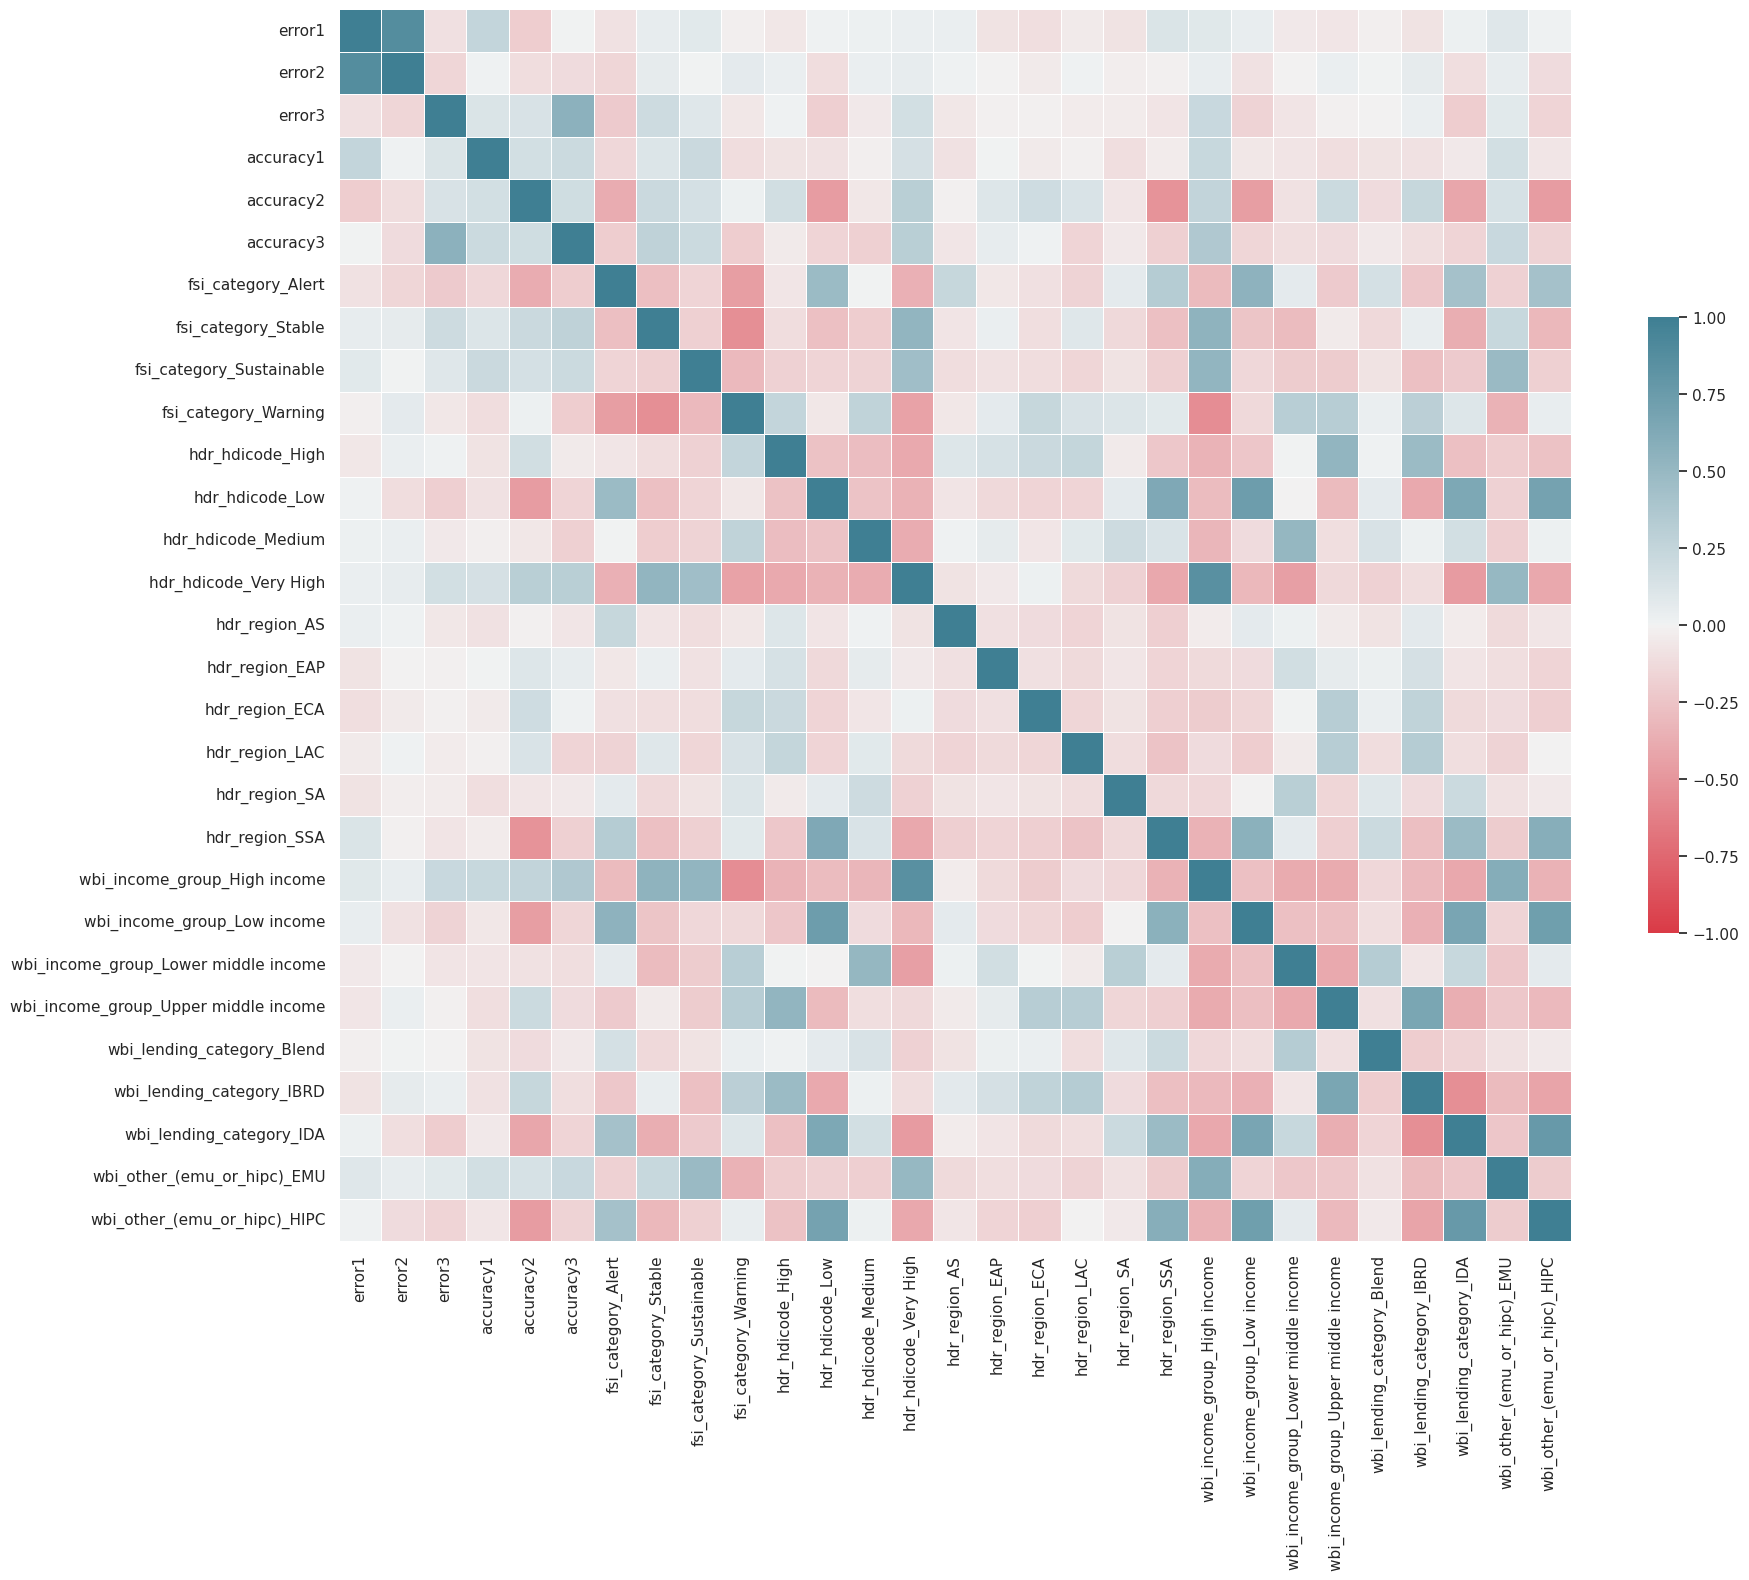

In [218]:
import matplotlib.pyplot as plt

def corr_heatmap(df):
    # plot correlation heatmap based on code from:
    # https://medium.com/@nikolh92/helpful-visualisations-for-linear-regression-646a5648ad9d
    sns.set(style="white")
    corr = df.corr()
    mask = np.zeros_like(corr, dtype=bool)
    #mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(20, 16))
    cmap = sns.diverging_palette(10, 220, as_cmap=True)
    return sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, square=True,
                       linewidths=.5, annot=False, cbar_kws={"shrink": .5})

_ = corr_heatmap(df_oh_sm)

From this heatmap I can see that 
- the `xgboost` error is negatively correlated with the errors of the other two models, which are highly positively correlated
- the accuracy's are all positively correlated
- and there is a mix of positive and negative correlations between the "errors" and the "accuracy's"

I see many weak correlations with the error and accuracy outcomes which we might be able to leverage predictively; however, I am somewhat concerned about the fact that there are some relatively stronger negative and positive correlations within the indicator variables themselves (corresponding to the relatively dark red and dark blue cells in the correlation matrix).
- My concern is that strong correlations suggest the presense of **multicollinearity** which would (tend to increase p-values and) weaken statistical signifiance because if two predictor variables are highly correlated (or multiple predictor variables together have high **multicollinearity**) then we often become unsure as to which of the predictors to attribute responsibiltiy of average changes to and then the "effects" end up getting watered down by dividing the effect between all the possible predictors.
- The more problematic the **multicollinearity** the larger the **condition number** ("Cond. No.") reported by `.fit().summary()` will be.

I'm therefore not going to use the following variables: `'fsi_category_Stable', 'hdr_hdicode_Very High', 'wbi_income_group_High income', 'wbi_lending_category_IBRD', 'wbi_other_(emu_or_hipc)_HIPC'` and `'hdr_region_SSA'`

- However, I also sort of "have to" remove one of these for each of the groups because if there are $k$ group levels in a categorical variable then all you need is $k-1$ indicators to represent all possible group levels since when none of the $k-1$ indicators are "on" then the last group level that doesn't have an indicator variable must be the one that's "on". 

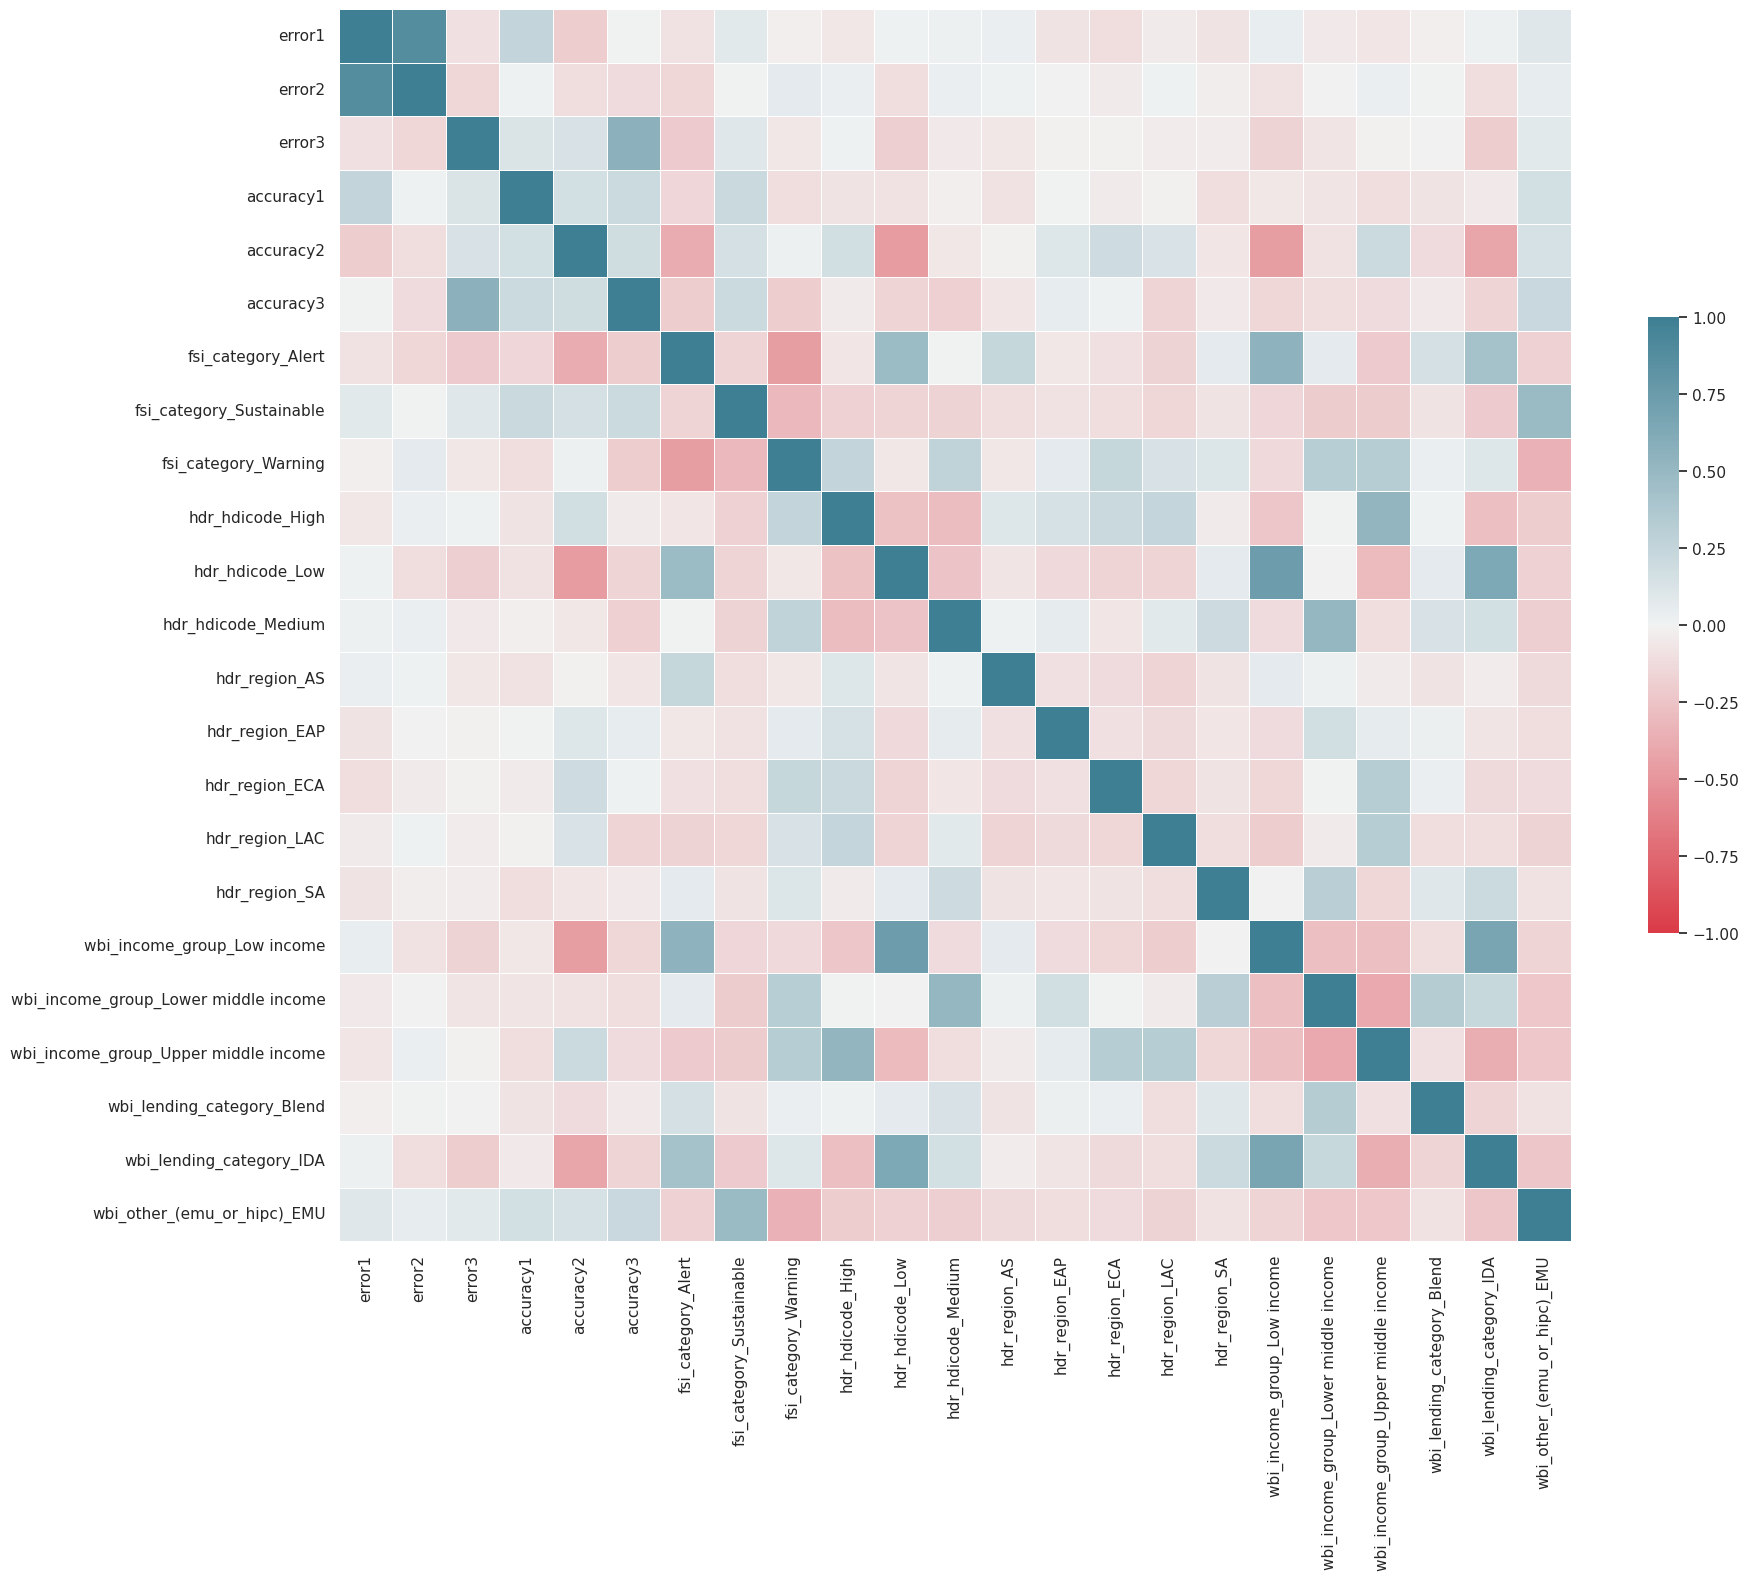

In [220]:
reduced_oh_cols = \
['fsi_category_Alert',
 'fsi_category_Sustainable',
 'fsi_category_Warning',
 'hdr_hdicode_High',
 'hdr_hdicode_Low',
 'hdr_hdicode_Medium',
 'hdr_region_AS',
 'hdr_region_EAP',
 'hdr_region_ECA',
 'hdr_region_LAC',
 'hdr_region_SA',
 'wbi_income_group_Low income',
 'wbi_income_group_Lower middle income',
 'wbi_income_group_Upper middle income',
 'wbi_lending_category_Blend',
 'wbi_lending_category_IDA',
 'wbi_other_(emu_or_hipc)_EMU']

_ = corr_heatmap(df_oh[['error1','error2','error3','accuracy1','accuracy2','accuracy3'] + reduced_oh_cols])

In [221]:
df_oh['model1'] = df_oh['error1'].astype(str)*0+"transformer"
df_oh['model2'] = df_oh['error2'].astype(str)*0+"ffnn"
df_oh['model3'] = df_oh['error3'].astype(str)*0+"xgboost"

# 0/1 "one hot" indicator variables don't get standardized the way continuous numeric predictors do
design_matrix = \
pd.concat([df_oh[['error1']+reduced_oh_cols].join(df_oh['model1']).rename(columns={'error1':'error','model1':'model'}),
           df_oh[['error2']+reduced_oh_cols].join(df_oh['model2']).rename(columns={'error2':'error','model2':'model'}),
           df_oh[['error3']+reduced_oh_cols].join(df_oh['model3']).rename(columns={'error3':'error','model3':'model'})],
          ignore_index=True)

# create interactions
for x in reduced_oh_cols:
    design_matrix['transformer X '+x] = design_matrix[x]*(design_matrix.model=='transformer')
for x in reduced_oh_cols:
    design_matrix['xgboost X '+x] = design_matrix[x]*(design_matrix.model=='xgboost')

y = design_matrix['error']
del design_matrix['error']
del design_matrix['model']
design_matrix

fsi_category_Alert  fsi_category_Sustainable  fsi_category_Warning  \
0                      0                         0                     1   
1                      0                         0                     1   
2                      0                         0                     1   
3                      0                         0                     1   
4                      0                         0                     1   
...                  ...                       ...                   ...   
1087                   0                         0                     0   
1088                   0                         0                     0   
1089                   0                         0                     0   
1090                   0                         0                     0   
1091                   0                         0                     0   

      hdr_hdicode_High  hdr_hdicode_Low  hdr_hdicode_Medium  hdr_region_AS  \
0                    1                0                   0              0   
1                    1                0                   0              0   
2                    0                0                   0              0   
3                    0                0                   0              0   
4                    0                0                   0              0   
...                ...              ...                 ...            ...   
1087                 0                0                   0              0   
1088                 0                0                   0              0   
1089                 0                0                   0              0   
1090                 0                0                   0              0   
1091                 0                0                   0              0   

      hdr_region_EAP  hdr_region_ECA  hdr_region_LAC  ...  \
0                  1               0               0  ...   
1                  1               0               0  ...   
2                  0               0               0  ...   
3                  0               0               0  ...   
4                  0               0               0  ...   
...              ...             ...             ...  ...   
1087               0               1               0  ...   
1088               0               1               0  ...   
1089               0               0               1  ...   
1090               0               0               1  ...   
1091               0               0               1  ...   

      xgboost X hdr_region_EAP  xgboost X hdr_region_ECA  \
0                            0                         0   
1                            0                         0   
2                            0                         0   
3                            0                         0   
4                            0                         0   
...                        ...                       ...   
1087                         0                         1   
1088                         0                         1   
1089                         0                         0   
1090                         0                         0   
1091                         0                         0   

      xgboost X hdr_region_LAC  xgboost X hdr_region_SA  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   
...                        ...                      ...   
1087                         0                        0   
1088                         0                        0   
1089                         1                        0   
1090                         1                        0   
1091                         1                       

In [222]:
model = sm.OLS(y, sm.add_constant(design_matrix))
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  error   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     1.693
Date:                Mon, 17 Jul 2023   Prob (F-statistic):            0.00204
Time:                        19:24:25   Log-Likelihood:                -412.06
No. Observations:                1092   AIC:                             928.1
Df Residuals:                    1040   BIC:                             1188.
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
const                                                 -0.1957      0.033     -6.013      0.000      -0.260      -0.132
fsi_category_Alert                                    -0.1596      0.099     -1.617      0.106      -0.353       0.034
fsi_category_Sustainable                              -0.0668      0.075     -0.890      0.374      -0.214       0.080
fsi_category_Warning                                  -0.0182      0.076     -0.239      0.811      -0.167       0.131
hdr_hdicode_High                                       0.0277      0.076      0.362      0.717      -0.122       0.178
hdr_hdicode_Low                                       -0.0748      0.110     -0.680      0.497      -0.291       0.141
hdr_hdicode_Medium                                     0.0150      0.087      0.172      0.864      -0.156       0.186
hdr_region_AS                                         -0.0117      0.073     -0.159      0.873      -0.155       0.132
hdr_region_EAP                                        -0.0847      0.084     -1.005      0.315      -0.250       0.081
hdr_region_ECA                                        -0.1271      0.079     -1.611      0.108      -0.282       0.028
hdr_region_LAC                                        -0.0673      0.063     -1.068      0.286      -0.191       0.056
hdr_region_SA                                         -0.0586      0.092     -0.633      0.527      -0.240       0.123
wbi_income_group_Low income                            0.1111      0.145      0.769      0.442      -0.173       0.395
wbi_income_group_Lower middle income                   0.0627      0.119      0.528      0.597      -0.170       0.296
wbi_income_group_Upper middle income                   0.0358      0.095      0.377      0.706      -0.150       0.222
wbi_lending_category_Blend                             0.0141      0.104      0.136      0.892      -0.189       0.217
wbi_lending_category_IDA                              -0.0588      0.081     -0.730      0.466      -0.217       0.099
wbi_other_(emu_or_hipc)_EMU                            0.0268      0.070      0.385      0.700      -0.110       0.164
transformer X fsi_category_Alert                      -0.1118      0.140     -0.801      0.423      -0.386       0.162
transformer X fsi_category_Sustainable                 0.0520      0.103      0.506      0.613      -0.150       0.254
transformer X fsi_category_Warning                    -0.0897      0.107     -0.837      0.403      -0.300       0.121
transformer X hdr_hdicode_High                         0.0725      0.108      0.671      0.502      -0.140       0.285
transformer X hdr_hdicode_Low                          0.1099      0.155      0.707      0.480      -0.195  

***Evan worse than before: going to examine just the two most significant indicator variables!***

In [223]:
df_oh['model1'] = df_oh['error1'].astype(str)*0+"transformer"
df_oh['model2'] = df_oh['error2'].astype(str)*0+"ffnn"
df_oh['model3'] = df_oh['error3'].astype(str)*0+"xgboost"

# using the variables that have seemed potentially "interesting" so far...
more_reduced_oh_cols = ['fsi_category_Alert','hdr_region_ECA']
# 0/1 "one hot" indicator variables don't get standardized the way continuous numeric predictors do
design_matrix = \
pd.concat([df_oh[['error1']+more_reduced_oh_cols].join(df_oh['model1']).rename(columns={'error1':'error','model1':'model'}),
           df_oh[['error2']+more_reduced_oh_cols].join(df_oh['model2']).rename(columns={'error2':'error','model2':'model'}),
           df_oh[['error3']+more_reduced_oh_cols].join(df_oh['model3']).rename(columns={'error3':'error','model3':'model'})],
          ignore_index=True)

# create interactions
for x in more_reduced_oh_cols:
    design_matrix['transformer X '+x] = design_matrix[x]*(design_matrix.model=='transformer')
for x in more_reduced_oh_cols:
    design_matrix['xgboost X '+x] = design_matrix[x]*(design_matrix.model=='xgboost')

y = design_matrix['error']
del design_matrix['error']
del design_matrix['model']
design_matrix

fsi_category_Alert  hdr_region_ECA  transformer X fsi_category_Alert  \
0                      0               0                                 0   
1                      0               0                                 0   
2                      0               0                                 0   
3                      0               0                                 0   
4                      0               0                                 0   
...                  ...             ...                               ...   
1087                   0               1                                 0   
1088                   0               1                                 0   
1089                   0               0                                 0   
1090                   0               0                                 0   
1091                   0               0                                 0   

      transformer X hdr_region_ECA  xgboost X fsi_category_Alert  \
0                                0                             0   
1                                0                             0   
2                                0                             0   
3                                0                             0   
4                                0                             0   
...                            ...                           ...   
1087                             0                             0   
1088                             0                             0   
1089                             0                             0   
1090                             0                             0   
1091                             0                             0   

      xgboost X hdr_region_ECA  
0                            0  
1                            0  
2                            0  
3                            0  
4                            0  
...                        ...  
1087                         1  
1088                         1  
1089                         0  
1090                         0  
1091                         0  

[1092 rows x 6 columns]

In [224]:
model = sm.OLS(y, sm.add_constant(design_matrix))
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  error   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     6.414
Date:                Mon, 17 Jul 2023   Prob (F-statistic):           1.18e-06
Time:                        19:24:39   Log-Likelihood:                -436.56
No. Observations:                1092   AIC:                             887.1
Df Residuals:                    1085   BIC:                             922.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -0.2561      0.013    -19.817      0.000      -0.281      -0.231
fsi_category_Alert                  -0.1039      0.045     -2.304      0.021      -0.192      -0.015
hdr_region_ECA                      -0.0332      0.060     -0.552      0.581      -0.151       0.085
transformer X fsi_category_Alert     0.0046      0.061      0.075      0.940      -0.116       0.125
transformer X hdr_region_ECA        -0.1101      0.083     -1.323      0.186      -0.273       0.053
xgboost X fsi_category_Alert        -0.1308      0.061     -2.133      0.033      -0.251      -0.010
xgboost X hdr_region_ECA            -0.0362      0.083     -0.435      0.663      -0.199       0.127
==============================================================================
Omnibus:                      211.391   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              344.471
Skew:                           1.295   Prob(JB):                     1.58e-75
Kurtosis:                       3.929   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

***Going to try to bring the continuous variables that might have been interesting earlier back into the analysis***

In [225]:
df_oh['model1'] = df_oh['error1'].astype(str)*0+"transformer"
df_oh['model2'] = df_oh['error2'].astype(str)*0+"ffnn"
df_oh['model3'] = df_oh['error3'].astype(str)*0+"xgboost"

# using the variables that have seemed potentially "interesting" so far...
more_reduced_oh_cols = ['fsi_category_Alert','hdr_region_ECA',
                        'sowc_child-mortality__under-five-mortality-rate_2021',
                        'sowc_adolescents__adolescent-population-2021_proportion-of-total-population_total',
                        'sowc_adolescents__adolescent-population-2021_aged-10-19-thousands_total']
design_matrix = \
pd.concat([df_oh[['error1']+more_reduced_oh_cols].join(df_oh['model1']).rename(columns={'error1':'error','model1':'model'}),
           df_oh[['error2']+more_reduced_oh_cols].join(df_oh['model2']).rename(columns={'error2':'error','model2':'model'}),
           df_oh[['error3']+more_reduced_oh_cols].join(df_oh['model3']).rename(columns={'error3':'error','model3':'model'})],
          ignore_index=True)
# 0/1 "one hot" indicator variables don't get standardized the way continuous numeric predictors do
design_matrix[more_reduced_oh_cols[2:]] = (design_matrix[more_reduced_oh_cols[2:]]-design_matrix[more_reduced_oh_cols[2:]].mean())/design_matrix[more_reduced_oh_cols[2:]].std()

# create interactions
for x in more_reduced_oh_cols:
    design_matrix['transformer X '+x] = design_matrix[x]*(design_matrix.model=='transformer')
for x in more_reduced_oh_cols:
    design_matrix['xgboost X '+x] = design_matrix[x]*(design_matrix.model=='xgboost')

y = design_matrix['error']
del design_matrix['error']
del design_matrix['model']
design_matrix

fsi_category_Alert  hdr_region_ECA  \
0                      0               0   
1                      0               0   
2                      0               0   
3                      0               0   
4                      0               0   
...                  ...             ...   
1087                   0               1   
1088                   0               1   
1089                   0               0   
1090                   0               0   
1091                   0               0   

      sowc_child-mortality__under-five-mortality-rate_2021  \
0                                              0.037909      
1                                              0.037909      
2                                              0.734358      
3                                              0.734358      
4                                              0.734358      
...                                                 ...      
1087                                          -0.876655      
1088                                          -0.876655      
1089                                          -0.371341      
1090                                          -0.371341      
1091                                          -0.371341      

      sowc_adolescents__adolescent-population-2021_proportion-of-total-population_total  \
0                                              0.221627                                   
1                                              0.221627                                   
2                                              1.309362                                   
3                                              1.309362                                   
4                                              1.309362                                   
...                                                 ...                                   
1087                                          -0.891872                                   
1088                                          -0.891872                                   
1089                                          -0.749180                                   
1090                                          -0.749180                                   
1091                                          -0.749180                                   

      sowc_adolescents__adolescent-population-2021_aged-10-19-thousands_total  \
0                                             -0.325791                         
1                                             -0.325791                         
2                                              0.199512                         
3                                              0.199512                         
4                                              0.199512                         
...                                                 ...                         
1087                                          -0.328952                         
1088                                          -0.328952                         
1089                                          -0.324638                         
1090                                          -0.324638                         
1091                                          -0.324638                         

      transformer X fsi_category_Alert  transformer X hdr_region_ECA  \
0                                    0                             0   
1                                    0                             0   
2                                    0                             0   
3                                    0                             0   
4                                    0                             0   
...                                ...                           ...   
1087                                 0                             0   
1088                                 0                             0   
1089              

In [226]:
model = sm.OLS(y, sm.add_constant(design_matrix))
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  error   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     4.065
Date:                Mon, 17 Jul 2023   Prob (F-statistic):           2.88e-07
Time:                        19:24:45   Log-Likelihood:                -425.50
No. Observations:                1092   AIC:                             883.0
Df Residuals:                    1076   BIC:                             962.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================================================================================================
                                                                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                              -0.2590      0.013    -19.636      0.000      -0.285      -0.233
fsi_category_Alert                                                                                 -0.0591      0.053     -1.114      0.266      -0.163       0.045
hdr_region_ECA                                                                                     -0.0442      0.062     -0.716      0.474      -0.165       0.077
sowc_child-mortality__under-five-mortality-rate_2021                                               -0.0757      0.032     -2.396      0.017      -0.138      -0.014
sowc_adolescents__adolescent-population-2021_proportion-of-total-population_total                   0.0436      0.031      1.414      0.158      -0.017       0.104
sowc_adolescents__adolescent-population-2021_aged-10-19-thousands_total                             0.0013      0.019      0.069      0.945      -0.036       0.039
transformer X fsi_category_Alert                                                                   -0.0668      0.072     -0.934      0.351      -0.207       0.074
transformer X hdr_region_ECA                                                                       -0.0901      0.086     -1.048      0.295      -0.259       0.079
transformer X sowc_child-mortality__under-five-mortality-rate_2021                                  0.0612      0.045      1.375      0.170      -0.026       0.149
transformer X sowc_adolescents__adolescent-population-2021_proportion-of-total-population_total    -0.0006      0.044     -0.014      0.989      -0.086       0.085
transformer X sowc_adolescents__adolescent-population-2021_aged-10-19-thousands_total              -0.0600      0.027     -2.234      0.026      -0.113      -0.007
xgboost X fsi_category_Alert                                                                       -0.1307      0.072     -1.827      0.068      -0.271       0.010
xgboost X hdr_region_ECA                                                                           -0.0547      0.086     -0.636      0.525      -0.223       0.114
xgboost X sowc_child-mortality__under-five-mortality-rate_2021                                      0.0826      0.045      1.854      0.064      -0.005       0.170
xgboost X sowc_adolescents__adolescent-population-2021_proportion-of-total-population_total        -0.0918      0.044     -2.107      0.035      -0.177      -0.006
xgboost X sowc_adolescents__adolescent-population-2021_aged-10-19-thousands_total                  -0.0077      0.027     -0.286   

***I've not managed to yet find a lot of predictive power in everything I've examined so far... there does seem to be a few variables that we've seen have some significance... It's been hard to find significance for indicator varaibles; so, it seems like the continuous variables should be examined and explored more closely for possible predictive performance differentiation power... Generally, I think the key will be to keep the number of variables under consideration in the model very small... the columns of design matrices that are not significant should be removed so that the final models only include significant coefficients... The assumptions of the regression model should then be critiqued... and then it seems very important to further confirm reliability of the findings by performing a train-test analysis... It's important to keep the regression analysis as simple as possible; then, the findings to be re-examined using classification decision trees to try to further confirm the validity of your findings and provide additional characterizations of performance predicted expectations on the basis of your findings.***

# Predicting Conflict in STA130: understanding models' differing performance

Some scratch work...

In [193]:
# mostly answer is False, so a lot of agreement based on that is to be expected; however,
# there doesn't in fact appear to be a lot of agreement there; actually, 
# there are quite different positive class prediction rates
df.y_pred_transformer.mean(), df.y_true_transformer.mean(), (df.y_pred_transformer==df.y_true_transformer).mean()

(0.40934065934065933, 0.14835164835164835, 0.6181318681318682)

In [194]:
df.y_pred_xgboost.mean(), df.y_true_xgboost.mean(), (df.y_pred_xgboost==df.y_true_xgboost).mean()

(0.5576923076923077, 0.14560439560439561, 0.5054945054945055)

In [195]:
df.y_pred_ffnn.mean(), df.y_true_ffnn.mean(), (df.y_pred_ffnn==df.y_true_ffnn).mean()

(0.25, 0.14835164835164835, 0.728021978021978)

## Exploring models performance on test set

While the three models perform similarly according to some metrics like area under ROC curve, each model has better scores on different metrics like F1, recall, TPR, TNR, etc.

In order for an organization like UNICEF to make informed decisions based on model predictions, we need to better understand the strengths and weaknesses of these models. For example, does one model perform better in specific regions/geographies compared to the others? Is one more accurate making predictions for richer countries and another more accurate for poorer countries? With some heuristics, could these models be stacked to offer higher overall accuracy?

We can probe these questions in a number of ways:
- compute and compare model metrics for subsets of countries (like Human Development Index categories, Fragile States Index categories, World Bank economy categories, etc)
- use statistical models to explore and explain correlations between model accuracy and country-level features that characterize the country context

### Are model metrics different across certain groups of countries?

In [197]:
group_metrics = list()
# lets group countries by Human Development index category.
# could also group by continent, language, bins of under-5 mortality, etc
for g, rows in df.groupby('hdr_hdicode'):
    for model in ['ffnn', 'xgboost', 'transformer']:
        # sklearn.metrics has many metrics appropriate for binary classification tasks.
        # nice explanations here: https://neptune.ai/blog/evaluation-metrics-binary-classification
        group_metrics.append((model, g, metrics.cohen_kappa_score(rows[f"y_true_{model}"],
                                                                    rows[f"y_pred_{model}"])))
df_metrics = pd.DataFrame(group_metrics,
                          columns=('model', 'hdr_hdicode group', 'cohen_kappa_score'))

cm_bigger_better = sns.light_palette("green", as_cmap=True)
# https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html#Styler-Object-and-Customising-the-Display
styler = (df_metrics
            .sort_values('hdr_hdicode group')
            .style
                .background_gradient(cmap=cm_bigger_better)
                .format(precision=3)
                .hide(axis="index"))
styler

In [198]:
# TODO don't repeat yourself! refactor into function
# instead of copy/paste/reuse vars
group_metrics = list()
# lets group countries by Human Development index category.
# could also group by continent, language, bins of under-5 mortality, etc
for g, rows in df.groupby('hdr_hdicode'):
    for model in ['ffnn', 'xgboost', 'transformer']:
        # sklearn.metrics has many metrics appropriate for binary classification tasks.
        # nice explanations here: https://neptune.ai/blog/evaluation-metrics-binary-classification
        tn, fp, fn, tp = metrics.confusion_matrix(rows[f"y_true_{model}"],
                                                  rows[f"y_pred_{model}"]).ravel()
        false_positive_rate = fp / (fp + tn)
        group_metrics.append((model, g, false_positive_rate))
        
df_metrics = pd.DataFrame(group_metrics,
                          columns=('model', 'hdr_hdicode group', 'false_positive_rate'))

cm_smaller_better = sns.light_palette("red", as_cmap=True)
# https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html#Styler-Object-and-Customising-the-Display
styler = (df_metrics
            .sort_values('hdr_hdicode group')
            .style
                .background_gradient(cmap=cm_smaller_better)
                .format(precision=3)
                .hide(axis="index"))
styler

### Are SOWC indicators linearly related to the xgboost model's test set performance?

In [199]:
# quick and dirty scalars to represent prediction 'wrongness'
# (subtract model's prediction probability from boolean true value)
pred_delta = df['y_true_xgboost'].astype(float) - df['y_pred_proba_xgboost']

In [200]:
# Are SOWC indicators linearly related to the xgboost model's test set performance?
# pick some random sowc columns that don't have missing values.
exogs = df[[c for c in df.columns.values if c.startswith('sowc')]].dropna(axis='columns').sample(10, axis=1)

In [201]:
# with randomly chosen exogs we'll likely see multicollinearity.
# should do some EDA first and be principled in choosing
# features, scaling values, and specifying the model!
mod = sm.OLS(pred_delta, exogs)

In [202]:
res = mod.fit()

In [203]:
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.485
Model:                            OLS   Adj. R-squared (uncentered):              0.471
Method:                 Least Squares   F-statistic:                              33.37
Date:                Mon, 17 Jul 2023   Prob (F-statistic):                    2.21e-45
Time:                        19:17:59   Log-Likelihood:                         -142.75
No. Observations:                 364   AIC:                                      305.5
Df Residuals:                     354   BIC:                                      344.5
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                                                                                                         coef    std err

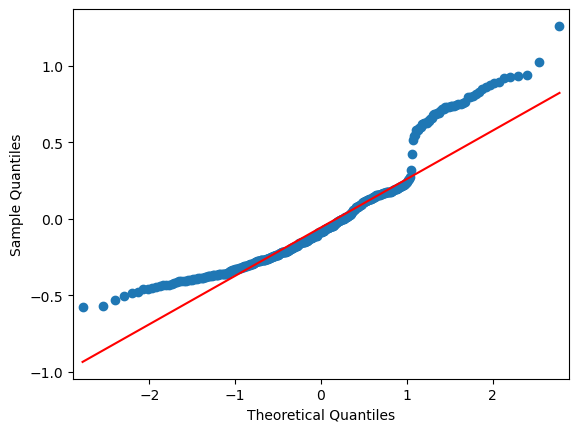

In [24]:
fig = sm.qqplot(res.resid, line="q")
plt.show()

### Do indicator values correlate with model performance values?

In [204]:
# ignore country identifiers
_df = df.drop(columns=['fips', 'iso3'])

# clean up `fsi_rank`
# '82nd' -> 82
_df['fsi_rank'] = df['fsi_rank'].astype('string').str.replace(r'\D', '', regex=True).replace('', pd.NA)

# categorical variables we will one-hot encode
cat_vars = ['fsi_category', 'hdr_hdicode', 'hdr_region',
            'wbi_income_group', 'wbi_lending_category',
            'wbi_other_(emu_or_hipc)']

print(df.shape)

# get one hot encodings
df_oh, oh_cols = one_hot(_df, cat_vars)
df_oh = df_oh.drop(columns=cat_vars)
print(df_oh.shape)
print(oh_cols)

(364, 1354)
(364, 1369)
['fsi_category_Alert', 'fsi_category_Stable', 'fsi_category_Sustainable', 'fsi_category_Warning', 'hdr_hdicode_High', 'hdr_hdicode_Low', 'hdr_hdicode_Medium', 'hdr_hdicode_Very High', 'hdr_region_AS', 'hdr_region_EAP', 'hdr_region_ECA', 'hdr_region_LAC', 'hdr_region_SA', 'hdr_region_SSA', 'wbi_income_group_High income', 'wbi_income_group_Low income', 'wbi_income_group_Lower middle income', 'wbi_income_group_Upper middle income', 'wbi_lending_category_Blend', 'wbi_lending_category_IBRD', 'wbi_lending_category_IDA', 'wbi_other_(emu_or_hipc)_EMU', 'wbi_other_(emu_or_hipc)_HIPC']


In [205]:
# make df of column names and their dtypes
df_cols = pd.DataFrame(df.dtypes, columns=('coldtype',)).reset_index().rename(columns={'index': 'colname'})
df_cols['coldtype'] = df_cols['coldtype'].astype('string')

# get list of numeric variables
num_vars = df_cols.query("coldtype=='float64'")['colname'].values

# choose a random sample of numeric columns.
some_num_var = np.random.choice(num_vars, int(len(num_vars)*.01))

# make df with sample of numeric columns, model test performance columns, and one-hot encoded categoricals
df_oh_sm = df_oh[list(some_num_var) + [c for c in df_preds if c.startswith('y')] + oh_cols]
print(df_oh_sm.shape)

(364, 46)


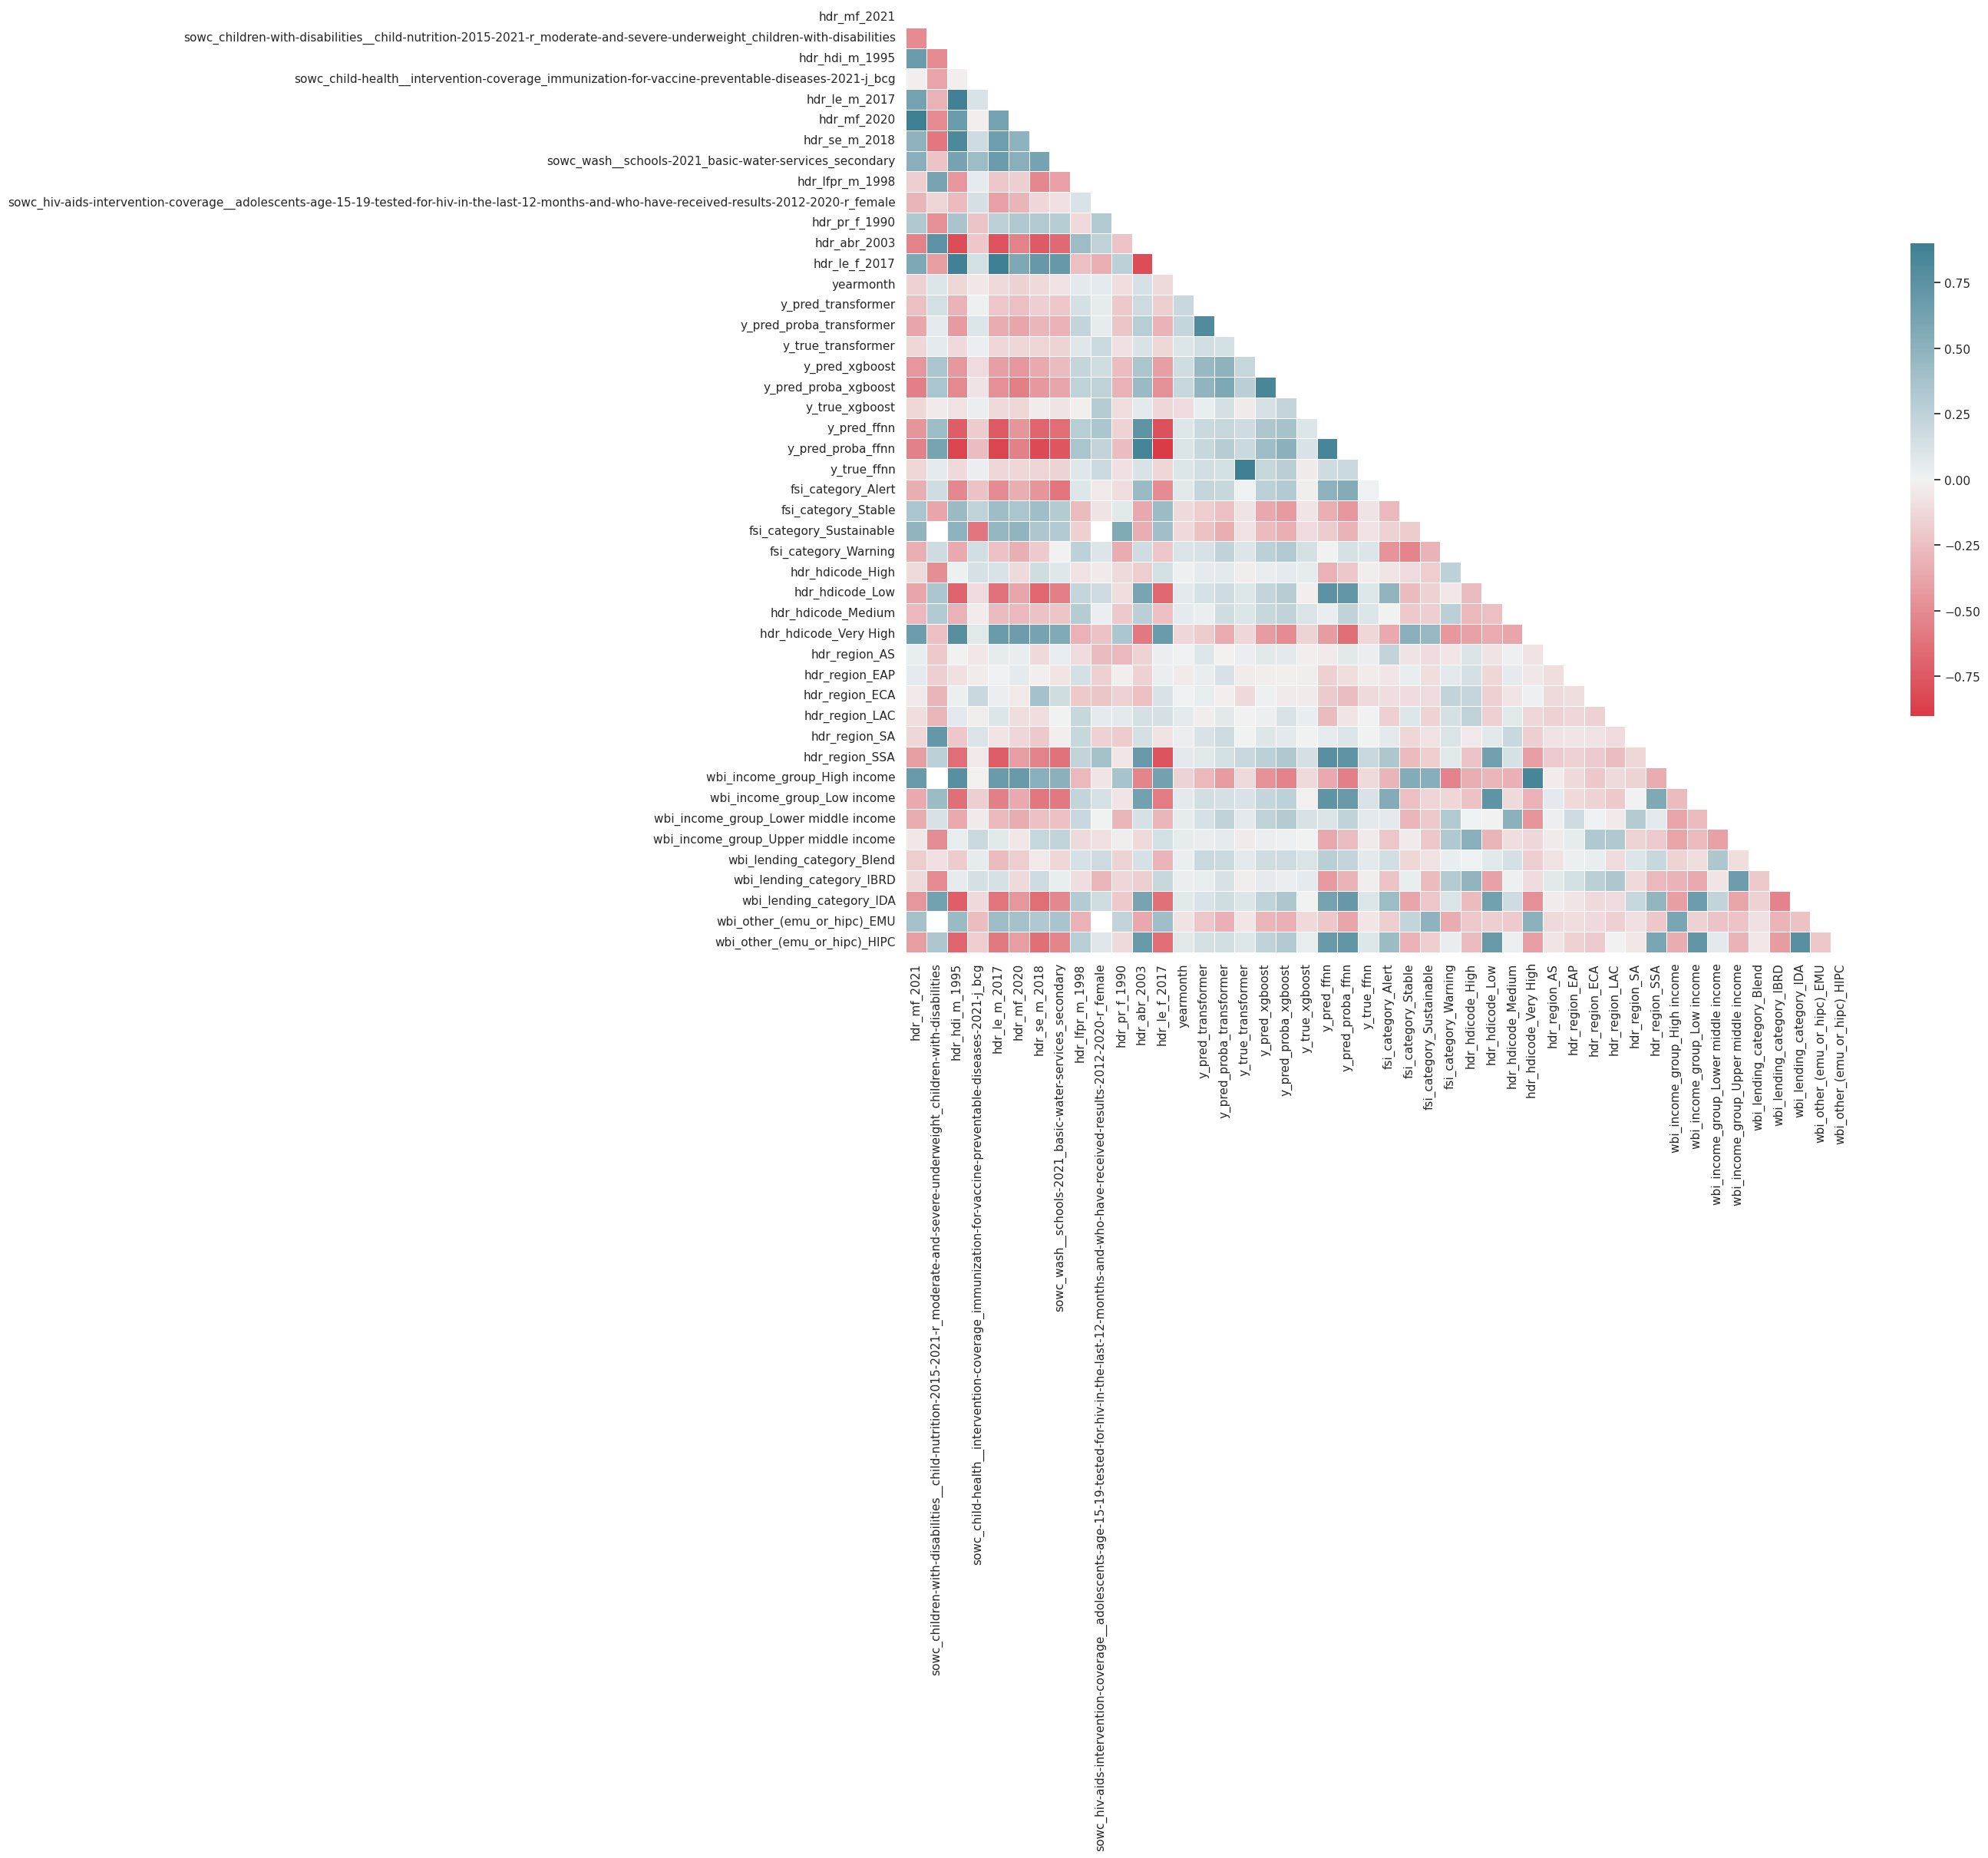

In [207]:
# different teams could expore specific hypotheses
# or topics with a principled subset of columns (instead of random)
# to unpack geographic or economic or social/technology correlations.
# teams could also 'bring their own' country-level indicators from
# other sources too!
corr_heatmap(df_oh_sm);

In [20]:
# NOTE some dependencies are probably missing
# https://github.com/rasbt/watermark/issues/74
%load_ext watermark
%watermark -u -i -m -v -iv --author ewheeler@unicef.org

Author: ewheeler@unicef.org

Last updated: 2023-07-10T09:36:52.717960-04:00

Python implementation: CPython
Python version       : 3.10.9
IPython version      : 8.12.0

Compiler    : Clang 14.0.6 
OS          : Darwin
Release     : 21.4.0
Machine     : arm64
Processor   : arm
CPU cores   : 10
Architecture: 64bit

seaborn    : 0.12.2
pandas     : 2.0.1
numpy      : 1.23.4
matplotlib : 3.6.3
sklearn    : 1.2.2
statsmodels: 0.13.5

